The follownig codes are used to import python packages library which is used for the cleaning and visualization of data.
Re- Used for string manipulation, pattern matching, and cleaning data

•	pandas:powerful library for data manipulation and analysis. It provides data structures like DataFrames for working with tabular data. Key for importing, cleaning, and preprocessing data.

•	numpy:
Supports numerical computations and provides tools for handling arrays, mathematical operations, and handling missing data efficiently.

•	matplotlib.pyplot:
A popular library for creating static, animated, and interactive visualizations in Python.
•	seaborn:it provides a high-level interface for creating visually appealing statistical graphics.



In [ ]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Importing generation and treatment datasets using pandas
generation_data = pd.read_csv(r"C:\Users\deeps\Downloads\quarterly_waste_generation (1).csv")
treatment_data = pd.read_csv(r"C:\Users\deeps\Downloads\quarterly_waste_treatment (1).csv")

In [ ]:
#verifying the column values of generation dataset
generation_data.head(10)

Quarter         County     Waste Type  \
0          2004 Q4     Co. Antrim      Hazardous   
1       01-01-2004         Antrim      Hazardous   
2       01/01/2004         Antrim      Hazardous   
3          Q1 2004  county Antrim      Hazardous   
4           2004Q1     Antrim co.  Non-Hazardous   
5       01-01-2004  Antrim county  Non-Hazardous   
6  01 January 2004  Antrim county  Non-Hazardous   
7          2004 Q1         Antrim  Non-Hazardous   
8              NaN         Antrim  Non-Hazardous   
9              NaN  County Carlow      Hazardous   

                             Waste Category Waste Amount (tonnes)  
0                            Chemical_Waste             14,019.80  
1                Waste Electronic (E-Waste)             16,585.47  
2                Industrial Hazardous Waste             20,131.46  
3                             Waste Medical                   NaN  
4                        Agricultural_Waste             10,779.94  
5         CONSTRUCTION AND DEMOLITION WASTE             13,516.83  
6            INDUSTRIAL NON-HAZARDOUS WASTE             27,502.64  
7  M u n i c i p a l  S o l i d  W a s t e              15,975.40  
8                           Organic Waste                   12209  
9                            Chemical Waste              26329.67

In [ ]:
#verifying the column values of generation dataset
treatment_data.head(10)

Quarter         County     Waste Type              Waste Category  \
0      2004Q1         Antrim      Hazardous              Chemical Waste   
1     Q1 2004  county Antrim      Hazardous            Chemical Waste     
2     2004 Q1         Antrim      Hazardous  Waste (E-Waste) Electronic   
3     2004 Q4         Antrim      Hazardous  Electronic Waste (E-Waste)   
4         NaN         Antrim      Hazardous  INDUSTRIAL HAZARDOUS WASTE   
5      2004Q1         Antrim      Hazardous  Industrial_Hazardous_Waste   
6  01/01/2004         Antrim      Hazardous   M.e.d.i.c.a.l. W.a.s.t.e.   
7  01/01/2004         Antrim      Hazardous               MEDICAL WASTE   
8     Q4 2004     co. Antrim  Non-Hazardous          AGRICULTURAL WASTE   
9      2004Q1         Antrim  Non-Hazardous          AGRICULTURAL WASTE   

                Treatment Method Waste Amount (tonnes)  \
0        disposal - incineration        9813.86 tonnes   
1               disposal - other               4205.94   
2           RECOVERY - RECYCLING              14926.92   
3               disposal - other               1658.55   
4        Disposal - incineration                12,078   
5  D i s p o s a l  - o t h e r                8052.58   
6      Disposal - incineration                     NaN   
7  D i s p o s a l  - o t h e r                 3023.5   
8            Disposal - landfill               4311.98   
9          RECOVERY - COMPOSTING               4311.98   

  Price of Treatment (€ per tonne)  
0         348.259420051236 €/tonne  
1                   255.40 € tonne  
2                       69 euros/t  
3                   152.09 € tonne  
4        59.211277 euros per tonne  
5                    69.79 € tonne  
6                67.251521 €/tonne  
7                66.113067 euros/t  
8            70.730021 € per tonne  
9                    66.696962 €/t

In [ ]:
#Verifying data types and number of values present


In [ ]:
#Verifying data types and number of values present
treatment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45864 entries, 0 to 45863
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Quarter                           43521 non-null  object
 1   County                            43573 non-null  object
 2   Waste Type                        43568 non-null  object
 3   Waste Category                    44757 non-null  object
 4   Treatment Method                  44750 non-null  object
 5   Waste Amount (tonnes)             43634 non-null  object
 6   Price of Treatment (€ per tonne)  45864 non-null  object
dtypes: object(7)
memory usage: 2.4+ MB


In [ ]:
#Calculating unique values of generation dataset
generation_data.nunique()

Quarter                    672
County                     242
Waste Type                   2
Waste Category             114
Waste Amount (tonnes)    18084
dtype: int64

In [ ]:
#Calculating unique values of treatment dataset
treatment_data.nunique()

Quarter                               672
County                                234
Waste Type                              2
Waste Category                        114
Treatment Method                       94
Waste Amount (tonnes)               39436
Price of Treatment (€ per tonne)    33572
dtype: int64

In [ ]:
#Calculating null values of generation dataset
generation_data.isnull().sum()

Quarter                   999
County                    671
Waste Type               1016
Waste Category            439
Waste Amount (tonnes)    1024
dtype: int64

In [ ]:
#Calculating null values of treatment dataset
treatment_data.isnull().sum()

Quarter                             2343
County                              2291
Waste Type                          2296
Waste Category                      1107
Treatment Method                    1114
Waste Amount (tonnes)               2230
Price of Treatment (€ per tonne)       0
dtype: int64

In [ ]:
#Verifying Quarter values for cleaning
generation_data.Quarter.unique()

array(['2004 Q4', '01-01-2004', '01/01/2004', 'Q1 2004', '2004Q1',
       '01 January 2004', '2004 Q1', nan, '2004 Q2', '2004-01-01',
       'January 01, 2004', 'Q2 2004', '2004 Q3', 'Q4 2004', '2004Q2',
       '01 April 2004', '01-04-2004', '2004-04-01', 'April 01, 2004',
       '01/04/2004', 'Q3 2004', '2004Q3', 'July 01, 2004', '2004-07-01',
       '01/07/2004', '01-07-2004', '01 July 2004', '01-10-2004', '2004Q4',
       '01 October 2004', '01/10/2004', 'October 01, 2004', '2004-10-01',
       '2005Q1', '01-01-2005', '01/01/2005', '2005-01-01',
       'January 01, 2005', '01 January 2005', '2005 Q4', '2005 Q1',
       '2005 Q2', 'Q4 2005', 'Q3 2005', 'Q2 2005', 'Q1 2005', '2005Q2',
       '2005-04-01', '01-04-2005', '01/04/2005', 'April 01, 2005',
       '01 April 2005', '2005 Q3', '01 July 2005', '2005Q3', '01/07/2005',
       '2005-07-01', 'July 01, 2005', '01-07-2005', '2005Q4',
       '01/10/2005', '2005-10-01', 'October 01, 2005', '01 October 2005',
       '01-10-2005', '01-01

In [ ]:
#Verifying Quarter values for cleaning
treatment_data.Quarter.unique()

array(['2004Q1', 'Q1 2004', '2004 Q1', '2004 Q4', nan, '01/01/2004',
       'Q4 2004', 'Q2 2004', '2004-01-01', 'January 01, 2004',
       '01 January 2004', '01-01-2004', '2004 Q2', 'Q3 2004', '2004 Q3',
       '2004-04-01', '2004Q2', '01 April 2004', 'April 01, 2004',
       '01-04-2004', '01/04/2004', '2004-07-01', '01/07/2004', '2004Q3',
       'July 01, 2004', '01 July 2004', '01-07-2004', '01 October 2004',
       '2004Q4', 'October 01, 2004', '01/10/2004', '2004-10-01',
       '01-10-2004', 'January 01, 2005', '2005Q1', '01-01-2005',
       '01 January 2005', '01/01/2005', '2005-01-01', '2005 Q4',
       'Q1 2005', 'Q4 2005', '2005 Q2', 'Q3 2005', '2005 Q1', 'Q2 2005',
       '2005 Q3', 'April 01, 2005', '2005Q2', '01 April 2005',
       '01-04-2005', '01/04/2005', '2005-04-01', '2005-07-01', '2005Q3',
       'July 01, 2005', '01 July 2005', '01/07/2005', '01-07-2005',
       '2005-10-01', '2005Q4', '01-10-2005', 'October 01, 2005',
       '01/10/2005', '01 October 2005', '2006Q

In [ ]:
#Defining function to standardize Quarter Column
def standardize_quarter(quarter_value):
    """
    Convert various quarter representations into a consistent 'YYYY Q#' format.
    """
    # Check if quarter_value is a string
    if isinstance(quarter_value, str):
        # Handle formats like "YYYYQ#" and "YYYY Q#"
        if re.match(r"^\d{4} ?Q[1-4]$", quarter_value):  # e.g., "2004Q1" or "2004 Q1"
            return re.sub(r" ?Q", " Q", quarter_value.strip())  # Ensure "YYYY Q#"

        # Handle formats like "Q# YYYY"
        elif re.match(r"^Q[1-4] ?\d{4}$", quarter_value):  # e.g., "Q1 2004"
            return f"{quarter_value[-4:]} Q{quarter_value[1]}"

        # Handle date formats like "DD-MM-YYYY" or "DD/MM/YYYY" to determine the quarter
        elif re.match(r"^\d{2}[-/]\d{2}[-/]\d{4}$", quarter_value):
            # Parse day, month, year and calculate the quarter
            month = int(quarter_value[:2])
            year = quarter_value[-4:]
            quarter = (month - 1) // 3 + 1
            return f"{year} Q{quarter}"

    # Return NaN for missing or unrecognizable formats
    return np.nan


In [ ]:
# Apply the standardization function to the "Quarter" column in both datasets
generation_data['Quarter'] = generation_data['Quarter'].apply(standardize_quarter)
treatment_data['Quarter'] = treatment_data['Quarter'].apply(standardize_quarter)

In [ ]:
# Check results
print(generation_data['Quarter'].unique())

['2004 Q4' '2004 Q1' nan '2004 Q2' '2004 Q3' '2005 Q1' '2005 Q4' '2005 Q2'
 '2005 Q3' '2006 Q1' '2006 Q4' '2006 Q2' '2006 Q3' '2007 Q1' '2007 Q3'
 '2007 Q4' '2007 Q2' '2008 Q1' '2008 Q2' '2008 Q4' '2008 Q3' '2009 Q4'
 '2009 Q1' '2009 Q2' '2009 Q3' '2010 Q1' '2010 Q3' '2010 Q4' '2010 Q2'
 '2011 Q1' '2011 Q3' '2011 Q4' '2011 Q2' '2012 Q1' '2012 Q2' '2012 Q4'
 '2012 Q3' '2013 Q2' '2013 Q1' '2013 Q3' '2013 Q4' '2014 Q4' '2014 Q1'
 '2014 Q3' '2014 Q2' '2015 Q1' '2015 Q3' '2015 Q2' '2015 Q4' '2016 Q1'
 '2016 Q3' '2016 Q4' '2016 Q2' '2017 Q4' '2017 Q1' '2017 Q2' '2017 Q3'
 '2018 Q1' '2018 Q4' '2018 Q3' '2018 Q2' '2019 Q2' '2019 Q1' '2019 Q4'
 '2019 Q3' '2020 Q1' '2020 Q4' '2020 Q3' '2020 Q2' '2021 Q3' '2021 Q1'
 '2021 Q2' '2021 Q4' '2022 Q1' '2022 Q4' '2022 Q3' '2022 Q2' '2023 Q2'
 '2023 Q1' '2023 Q3' '2023 Q4' '2024 Q1' '2024 Q2' '2024 Q3' '2024 Q4']


In [ ]:
# Check results
print(treatment_data['Quarter'].unique())

['2004 Q1' '2004 Q4' nan '2004 Q2' '2004 Q3' '2005 Q1' '2005 Q4' '2005 Q2'
 '2005 Q3' '2006 Q1' '2006 Q4' '2006 Q3' '2006 Q2' '2007 Q1' '2007 Q2'
 '2007 Q3' '2007 Q4' '2008 Q1' '2008 Q2' '2008 Q4' '2008 Q3' '2009 Q1'
 '2009 Q3' '2009 Q2' '2009 Q4' '2010 Q1' '2010 Q3' '2010 Q4' '2010 Q2'
 '2011 Q1' '2011 Q2' '2011 Q4' '2011 Q3' '2012 Q1' '2012 Q2' '2012 Q3'
 '2012 Q4' '2013 Q1' '2013 Q2' '2013 Q3' '2013 Q4' '2014 Q1' '2014 Q2'
 '2014 Q4' '2014 Q3' '2015 Q4' '2015 Q1' '2015 Q3' '2015 Q2' '2016 Q1'
 '2016 Q3' '2016 Q2' '2016 Q4' '2017 Q1' '2017 Q4' '2017 Q2' '2017 Q3'
 '2018 Q1' '2018 Q4' '2018 Q3' '2018 Q2' '2019 Q2' '2019 Q1' '2019 Q4'
 '2019 Q3' '2020 Q1' '2020 Q2' '2020 Q3' '2020 Q4' '2021 Q1' '2021 Q2'
 '2021 Q3' '2021 Q4' '2022 Q1' '2022 Q2' '2022 Q4' '2022 Q3' '2023 Q1'
 '2023 Q2' '2023 Q3' '2023 Q4' '2024 Q1' '2024 Q2' '2024 Q4' '2024 Q3']


In [ ]:
#Replacing empty strings with nan
generation_data['Quarter'].replace("", np.nan, inplace=True)
treatment_data['Quarter'].replace("", np.nan, inplace=True)

In [ ]:
# verifying results
blanks_generation = (generation_data['Quarter'] == "").sum()
blanks_treatment = (generation_data['Quarter'] == "").sum()
print(f"Empty string count: {blanks_generation + blanks_generation}")

Empty string count: 0


In [ ]:
# Define a function to clean the County column
def clean_county(county_name):
    if isinstance(county_name, str):  # Check if the entry is a string
        county_name = county_name.strip()  # Remove leading and trailing whitespace
        county_name = county_name.title()  # Standardize to title case
        county_name = re.sub(r'[^a-zA-Z\s]', '', county_name)  # Remove any special characters
    return county_name

In [ ]:
# Apply the cleaning function to the County column in both datasets
generation_data['County'] = generation_data['County'].apply(clean_county)
treatment_data['County'] = treatment_data['County'].apply(clean_county)

In [ ]:
# Verify the cleaned County columns by viewing unique values
print("Unique County names in Generation Data:", generation_data['County'].unique())
print("Unique County names in Treatment Data:", treatment_data['County'].unique())

Unique County names in Generation Data: ['Co Antrim' 'Antrim' 'County Antrim' 'Antrim Co' 'Antrim County'
 'County Carlow' 'Carlow' 'Carlow Co' 'Co Carlow' 'Cavan' 'Cavan County'
 'Cavan Co' 'Clare County' 'Co Clare' 'Clare' 'Cork' 'County Cork'
 'Donegal' 'Donegal Co' 'Co Donegal' 'Down Co' 'Down County' 'County Down'
 'Down' 'Dublin' 'Co Dublin' 'Galway' 'Galway Co' 'Co Kerry' 'Kerry'
 'Kerry Co' 'Co Kildare' 'Kildare' 'County Kildare' 'Kildare Co'
 'Kildare County' 'Kilkenny' 'Kilkenny Co' nan 'Kilkenny County' 'Laois'
 'Co Laois' 'County Laois' 'Laois Co' 'Limerick' 'County Limerick'
 'Limerick County' 'Louth' 'Louth Co' 'County Louth' 'Co Louth'
 'Louth County' 'Mayo' 'Co Mayo' 'Meath' 'County Meath' 'Monaghan'
 'County Monaghan' 'Co Monaghan' 'Offaly' 'Offaly Co' 'Nan County'
 'Roscommon' 'Co Roscommon' 'Roscommon Co' 'Sligo' 'County Sligo'
 'Tipperary' 'County Tipperary' 'Tipperary County' 'Waterford Co'
 'Waterford' 'Waterford County' 'Westmeath' 'Westmeath Co'
 'County Westmea

In [ ]:
# Define a mapping dictionary to standardize county names
county_mapping = {
    'Co Antrim': 'Antrim', 'Antrim': 'Antrim', 'County Antrim': 'Antrim', 'Antrim Co': 'Antrim', 'Antrim County': 'Antrim',
    'Co Carlow': 'Carlow', 'Carlow': 'Carlow', 'County Carlow': 'Carlow', 'Carlow Co': 'Carlow', 'Carlow County': 'Carlow',
    'Co Cavan': 'Cavan', 'Cavan': 'Cavan', 'County Cavan': 'Cavan', 'Cavan Co': 'Cavan', 'Cavan County': 'Cavan',
    'Co Clare': 'Clare', 'Clare': 'Clare', 'County Clare': 'Clare', 'Clare Co': 'Clare', 'Clare County': 'Clare',
    'Co Cork': 'Cork', 'Cork': 'Cork', 'County Cork': 'Cork', 'Cork Co': 'Cork', 'Cork County': 'Cork',
    'Co Donegal': 'Donegal', 'Donegal': 'Donegal', 'County Donegal': 'Donegal', 'Donegal Co': 'Donegal', 'Donegal County': 'Donegal',
    'Co Down': 'Down', 'Down': 'Down', 'County Down': 'Down', 'Down Co': 'Down', 'Down County': 'Down',
    'Co Dublin': 'Dublin', 'Dublin': 'Dublin', 'County Dublin': 'Dublin', 'Dublin Co': 'Dublin', 'Dublin County': 'Dublin',
    'Co Galway': 'Galway', 'Galway': 'Galway', 'County Galway': 'Galway', 'Galway Co': 'Galway', 'Galway County': 'Galway',
    'Co Kerry': 'Kerry', 'Kerry': 'Kerry', 'County Kerry': 'Kerry', 'Kerry Co': 'Kerry', 'Kerry County': 'Kerry',
    'Co Kildare': 'Kildare', 'Kildare': 'Kildare', 'County Kildare': 'Kildare', 'Kildare Co': 'Kildare', 'Kildare County': 'Kildare',
    'Co Kilkenny': 'Kilkenny', 'Kilkenny': 'Kilkenny', 'County Kilkenny': 'Kilkenny', 'Kilkenny Co': 'Kilkenny', 'Kilkenny County': 'Kilkenny',
    'Co Laois': 'Laois', 'Laois': 'Laois', 'County Laois': 'Laois', 'Laois Co': 'Laois', 'Laois County': 'Laois',
    'Co Limerick': 'Limerick', 'Limerick': 'Limerick', 'County Limerick': 'Limerick', 'Limerick Co': 'Limerick', 'Limerick County': 'Limerick',
    'Co Louth': 'Louth', 'Louth': 'Louth', 'County Louth': 'Louth', 'Louth Co': 'Louth', 'Louth County': 'Louth',
    'Co Mayo': 'Mayo', 'Mayo': 'Mayo', 'County Mayo': 'Mayo', 'Mayo Co': 'Mayo', 'Mayo County': 'Mayo',
    'Co Meath': 'Meath', 'Meath': 'Meath', 'County Meath': 'Meath', 'Meath Co': 'Meath', 'Meath County': 'Meath',
    'Co Monaghan': 'Monaghan', 'Monaghan': 'Monaghan', 'County Monaghan': 'Monaghan', 'Monaghan Co': 'Monaghan', 'Monaghan County': 'Monaghan',
    'Co Offaly': 'Offaly', 'Offaly': 'Offaly', 'County Offaly': 'Offaly', 'Offaly Co': 'Offaly', 'Offaly County': 'Offaly',
    'Co Roscommon': 'Roscommon', 'Roscommon': 'Roscommon', 'County Roscommon': 'Roscommon', 'Roscommon Co': 'Roscommon', 'Roscommon County': 'Roscommon',
    'Co Sligo': 'Sligo', 'Sligo': 'Sligo', 'County Sligo': 'Sligo', 'Sligo Co': 'Sligo', 'Sligo County': 'Sligo',
    'Co Tipperary': 'Tipperary', 'Tipperary': 'Tipperary', 'County Tipperary': 'Tipperary', 'Tipperary Co': 'Tipperary', 'Tipperary County': 'Tipperary',
    'Co Waterford': 'Waterford', 'Waterford': 'Waterford', 'County Waterford': 'Waterford', 'Waterford Co': 'Waterford', 'Waterford County': 'Waterford',
    'Co Westmeath': 'Westmeath', 'Westmeath': 'Westmeath', 'County Westmeath': 'Westmeath', 'Westmeath Co': 'Westmeath', 'Westmeath County': 'Westmeath',
    'Co Wexford': 'Wexford', 'Wexford': 'Wexford', 'County Wexford': 'Wexford', 'Wexford Co': 'Wexford', 'Wexford County': 'Wexford',
    'Co Wicklow': 'Wicklow', 'Wicklow': 'Wicklow', 'County Wicklow': 'Wicklow', 'Wicklow Co': 'Wicklow', 'Wicklow County': 'Wicklow',
    # Handle cases of 'Nan County' or 'County Nan' by replacing with NaN
    'Nan County': pd.NA, 'County Nan': pd.NA, 'Nan Co': pd.NA, 'Co Nan': pd.NA
}

In [ ]:
# Apply the mapping to the 'County' column in each dataset
generation_data['County'] = generation_data['County'].map(county_mapping)
treatment_data['County'] = treatment_data['County'].map(county_mapping)

In [ ]:
# Verify by checking unique county names
print("Unique County names in Generation Data after standardization:", generation_data['County'].unique())
print("Unique County names in Treatment Data after standardization:", treatment_data['County'].unique())

Unique County names in Generation Data after standardization: ['Antrim' 'Carlow' 'Cavan' 'Clare' 'Cork' 'Donegal' 'Down' 'Dublin'
 'Galway' 'Kerry' 'Kildare' 'Kilkenny' nan 'Laois' 'Limerick' 'Louth'
 'Mayo' 'Meath' 'Monaghan' 'Offaly' <NA> 'Roscommon' 'Sligo' 'Tipperary'
 'Waterford' 'Westmeath' 'Wexford' 'Wicklow']
Unique County names in Treatment Data after standardization: ['Antrim' 'Carlow' 'Cavan' nan 'Clare' 'Cork' 'Donegal' 'Down' 'Dublin'
 'Galway' 'Kerry' 'Kildare' 'Kilkenny' 'Laois' 'Limerick' 'Louth' 'Mayo'
 'Meath' 'Monaghan' 'Offaly' 'Roscommon' 'Sligo' 'Tipperary' 'Waterford'
 'Westmeath' 'Wexford' 'Wicklow']


In [ ]:
# Inspect unique values to understand the current state of the 'Waste Type' column
print("Unique Waste Types in Generation Data before cleaning:", generation_data['Waste Type'].unique())
print("Unique Waste Types in Treatment Data before cleaning:", treatment_data['Waste Type'].unique())


Unique Waste Types in Generation Data before cleaning: ['Hazardous' 'Non-Hazardous' nan]
Unique Waste Types in Treatment Data before cleaning: ['Hazardous' 'Non-Hazardous' nan]


In [ ]:
print("NaNs in Generation Data:", generation_data['Waste Type'].isna().sum())
print("NaNs in Treatment Data:", treatment_data['Waste Type'].isna().sum())

NaNs in Generation Data: 1016
NaNs in Treatment Data: 2296


In [ ]:
# Strip leading and trailing spaces
generation_data['Waste Category'] = generation_data['Waste Category'].str.strip()
treatment_data['Waste Category'] = treatment_data['Waste Category'].str.strip()

In [ ]:
print("Unique Waste Types in Generation Data before cleaning:", generation_data['Waste Category'].unique())
print("Unique Waste Types in Treatment Data before cleaning:", treatment_data['Waste Category'].unique())

Unique Waste Types in Generation Data before cleaning: ['Chemical_Waste' 'Waste Electronic (E-Waste)'
 'Industrial Hazardous Waste' 'Waste Medical' 'Agricultural_Waste'
 'CONSTRUCTION AND DEMOLITION WASTE' 'INDUSTRIAL NON-HAZARDOUS WASTE'
 'M u n i c i p a l  S o l i d  W a s t e' 'Organic Waste'
 'Chemical Waste' 'Waste Industrial Hazardous' 'MEDICAL WASTE'
 'Agricultural Waste'
 'C o n s t r u c t i o n  a n d  D e m o l i t i o n  W a s t e'
 'Waste Municipal Solid' 'C h e m i c a l  W a s t e'
 'Electronic_Waste_(E-Waste)'
 'I.n.d.u.s.t.r.i.a.l. H.a.z.a.r.d.o.u.s. W.a.s.t.e.' 'medical waste'
 'Construction_and_Demolition_Waste' 'NAN' 'O r g a n i c  W a s t e'
 'Electronic Waste (E-Waste)' 'Medical_Waste'
 'C.o.n.s.t.r.u.c.t.i.o.n. a.n.d. D.e.m.o.l.i.t.i.o.n. W.a.s.t.e.'
 'Municipal_Solid_Waste' 'electronic waste (e-waste)'
 'I n d u s t r i a l  H a z a r d o u s  W a s t e' 'Waste Agricultural'
 'Demolition Waste and Construction' 'Industrial Waste Non-Hazardous'
 'MUNICIPAL SOLI

In [ ]:
# defining function to remove special characters and convert string in lower case
def clean_waste_type(value):
    if pd.isnull(value):
        return value  # Keep NaNs as they are
    value = value.lower()               # Convert to lowercase
    value = value.replace(".", "")      # Remove all dots
    value = value.replace(" ", "")      # Remove all spaces
    return ''.join(e for e in value if e.isalnum())  # Remove any remaining non-alphanumeric characters

In [ ]:
# Apply this function to the Waste Type columns in both datasets
generation_data['Waste Category'] = generation_data['Waste Category'].apply(clean_waste_type)
treatment_data['Waste Category'] = treatment_data['Waste Category'].apply(clean_waste_type)

In [ ]:
# Verify the current state unique values
generation_data['Waste Category'].unique()
treatment_data['Waste Category'].unique()

array(['chemicalwaste', 'wasteewasteelectronic', 'electronicwasteewaste',
       'industrialhazardouswaste', 'medicalwaste', 'agriculturalwaste',
       'constructionanddemolitionwaste', 'industrialnonhazardouswaste',
       'municipalsolidwaste', nan, 'organicwaste', 'nan',
       'demolitionandconstructionwaste', 'wasteelectronicewaste',
       'industrialwastenonhazardous', 'wastemedical', 'wasteagricultural',
       'wastenonhazardousindustrial', 'wasteindustrialnonhazardous',
       'nonhazardouswasteindustrial', 'constructionwasteanddemolition',
       'hazardouswasteindustrial', 'nonhazardousindustrialwaste',
       'electronicewastewaste', 'municipalwastesolid', 'wastechemical',
       'ewasteelectronicwaste', 'wasteorganic',
       'industrialwastehazardous', 'solidmunicipalwaste',
       'andwastedemolitionconstruction', 'demolitionandwasteconstruction',
       'wastesolidmunicipal', 'wasteindustrialhazardous',
       'constructiondemolitionwasteand', 'wasteconstructionanddem

In [ ]:
# Replacement dictionary based on the values provided
replacement_dict = {
    'chemical': 'Chemical Waste',
    'electronic': 'Electronic Waste',
    'medical': 'Medical Waste',
    'organic': 'Organic Waste',
    'demolition': 'Construction & Demolition Waste',
    'municipal': 'Municipal Solid Waste',
    'nonhazardous': 'Non-Hazardous Industrial Waste',
    'hazardous': 'Hazardous Industrial Waste',
    'agricultural': 'Agricultural Waste'
}

In [ ]:
# Function to replace waste types based on keywords
def replace_waste_type(value):
    if pd.isnull(value) or value == 'nan':  # Handle NaN or 'nan' strings
        return pd.NA
    for keyword, replacement in replacement_dict.items():
        if keyword in value :  # Check if keyword is in the value (case insensitive)
            return replacement
    return value  # Return the original value if no keyword is found

In [ ]:
# Applying the defined function
generation_data['Waste Category'] = generation_data['Waste Category'].apply(replace_waste_type)
treatment_data['Waste Category'] = treatment_data['Waste Category'].apply(replace_waste_type)

In [ ]:
# Verify the cleaned unique values
generation_data['Waste Category'].unique()
treatment_data['Waste Category'].unique()

array(['Chemical Waste', 'Electronic Waste', 'Hazardous Industrial Waste',
       'Medical Waste', 'Agricultural Waste',
       'Construction & Demolition Waste',
       'Non-Hazardous Industrial Waste', 'Municipal Solid Waste', <NA>,
       'Organic Waste'], dtype=object)

In [ ]:
# Grouping in Generation Data
generation_grouped = generation_data.groupby(['Waste Category', 'Waste Type']).size().reset_index(name='Count')
print("Grouped Waste Categories and Types in Generation Data:")
print(generation_grouped)

Grouped Waste Categories and Types in Generation Data:
                    Waste Category     Waste Type  Count
0               Agricultural Waste  Non-Hazardous   1976
1                   Chemical Waste      Hazardous   1964
2  Construction & Demolition Waste  Non-Hazardous   1978
3                 Electronic Waste      Hazardous   1979
4       Hazardous Industrial Waste      Hazardous   1974
5                    Medical Waste      Hazardous   1961
6            Municipal Solid Waste  Non-Hazardous   1955
7   Non-Hazardous Industrial Waste  Non-Hazardous   1954
8                    Organic Waste  Non-Hazardous   1969


In [ ]:
# Grouping in Treatment Data
treatment_grouped = treatment_data.groupby(['Waste Category', 'Waste Type']).size().reset_index(name='Count')
print("\nGrouped Waste Categories and Types in Treatment Data:")
print(treatment_grouped)


Grouped Waste Categories and Types in Treatment Data:
                    Waste Category     Waste Type  Count
0               Agricultural Waste  Non-Hazardous   5904
1                   Chemical Waste      Hazardous   3973
2  Construction & Demolition Waste  Non-Hazardous   3914
3                 Electronic Waste      Hazardous   3940
4       Hazardous Industrial Waste      Hazardous   3947
5                    Medical Waste      Hazardous   3921
6            Municipal Solid Waste  Non-Hazardous   5932
7   Non-Hazardous Industrial Waste  Non-Hazardous   5932
8                    Organic Waste  Non-Hazardous   3948


In [ ]:
# Define the mapping based on the groupby table
category_type_mapping = {
    'Agricultural Waste': 'Non-Hazardous',
    'Chemical Waste': 'Hazardous',
    'Construction & Demolition Waste': 'Non-Hazardous',
    'Electronic Waste': 'Hazardous',
    'Hazardous Industrial Waste': 'Hazardous',
    'Medical Waste': 'Hazardous',
    'Municipal Solid Waste': 'Non-Hazardous',
    'Non-Hazardous Industrial Waste': 'Non-Hazardous',
    'Organic Waste': 'Non-Hazardous'
}

# Function to apply the mapping for missing Waste Type values
def impute_waste_type(row):
    if pd.isna(row['Waste Type']):
        return category_type_mapping.get(row['Waste Category'], row['Waste Type'])
    else:
        return row['Waste Type']

In [ ]:
# Apply the function to both datasets
generation_data['Waste Type'] = generation_data.apply(impute_waste_type, axis=1)
treatment_data['Waste Type'] = treatment_data.apply(impute_waste_type, axis=1)

In [ ]:
print("NaNs in Generation Data:", generation_data['Waste Type'].isna().sum())
print("NaNs in Treatment Data:", treatment_data['Waste Type'].isna().sum())

NaNs in Generation Data: 41
NaNs in Treatment Data: 114


I cleaned the waste amount column using a user defined function clean_waste_amount to remove the non numeric values using regular experession fuction and converted the values into float datatype, it also converted the missing values in NaN. I rounded the waste amount to 2 decimal place using round function.

In [ ]:
# Function to clean and convert Waste Amount to float with 2 decimal points
def clean_waste_amount(df, column_name='Waste Amount (tonnes)'):
    # Remove non-numeric characters (except for decimal points)
    df[column_name] = df[column_name].replace('[^0-9.]', '', regex=True)

    # Convert the column to float, and handle any conversion errors (e.g., empty strings become NaN)
    df[column_name] = pd.to_numeric(df[column_name], errors='coerce')

    # Round to two decimal points
    df[column_name] = df[column_name].round(2)

    return df

In [ ]:
# Apply the cleaning function to both datasets
generation_data = clean_waste_amount(generation_data, 'Waste Amount (tonnes)')
treatment_data = clean_waste_amount(treatment_data, 'Waste Amount (tonnes)')

In [ ]:
# Check the data type and preview the column to verify
print(generation_data['Waste Amount (tonnes)'].dtype)
print(generation_data['Waste Amount (tonnes)'].head())

print(treatment_data['Waste Amount (tonnes)'].dtype)
print(treatment_data['Waste Amount (tonnes)'].head())

float64
0    14019.80
1    16585.47
2    20131.46
3         NaN
4    10779.94
Name: Waste Amount (tonnes), dtype: float64
float64
0     9813.86
1     4205.94
2    14926.92
3     1658.55
4    12078.00
Name: Waste Amount (tonnes), dtype: float64


To clean the Treatment Method column, first we checked the unique values using the built-in fuction and cleared the blank spaces using strip function. I then created a Mapping dictionary to make a unified formatting in the treatment column name( eg :.disposalincineration': 'Disposal - Incineration',disposalother': 'Disposal - Other', 'disposallandfill': 'Disposal - Landfill')

In [ ]:
#Verifying unique values of Treatment method column
treatment_data['Treatment Method'].unique()

array(['disposal - incineration', 'disposal - other',
       'RECOVERY - RECYCLING', 'Disposal - incineration',
       'D i s p o s a l  - o t h e r ', '   Disposal - incineration  ',
       'Disposal - landfill', 'RECOVERY - COMPOSTING',
       'D.i.s.p.o.s.a.l. - l.a.n.d.f.i.l.l.', 'Recovery - recycling',
       'Recovery_-_energy_recovery', 'landfill - Disposal',
       'R.e.c.o.v.e.r.y. - r.e.c.y.c.l.i.n.g.',
       'RECOVERY - ENERGY RECOVERY', 'Recovery - energy recovery',
       'incineration Disposal -', 'DISPOSAL - OTHER',
       'Recovery_-_recycling', 'Disposal - other', nan,
       'D i s p o s a l  - i n c i n e r a t i o n ',
       'D.i.s.p.o.s.a.l. - o.t.h.e.r.',
       'R.e.c.o.v.e.r.y. - c.o.m.p.o.s.t.i.n.g.', 'disposal - landfill',
       'recovery - recycling', 'recovery - energy recovery',
       'DISPOSAL - LANDFILL', '- recycling Recovery',
       '   Recovery - energy recovery  ',
       'R e c o v e r y  - c o m p o s t i n g ', 'n a n ',
       '   Disposal - 

In [ ]:
# Strip leading and trailing spaces
treatment_data['Treatment Method'] = treatment_data['Treatment Method'].str.strip()

In [ ]:
# Reusing clean_waste_type() to process Treatment Method column
treatment_data['Treatment Method'] = treatment_data['Treatment Method'].apply(clean_waste_type)

In [ ]:
treatment_data['Treatment Method'].unique()

array(['disposalincineration', 'disposalother', 'recoveryrecycling',
       'disposallandfill', 'recoverycomposting', 'recoveryenergyrecovery',
       'landfilldisposal', 'incinerationdisposal', nan,
       'recyclingrecovery', 'nan', 'energyrecoveryrecovery',
       'recoveryrecoveryenergy', 'compostingrecovery', 'otherdisposal'],
      dtype=object)

In [ ]:
# Replacement dictionary based on the table

Treatment_dict = {
    'disposalincineration': 'Disposal - Incineration',
    'disposalother': 'Disposal - Other',
    'recoveryrecycling': 'Recovery - Recycling',
    'disposallandfill': 'Disposal - Landfill',
    'recoverycomposting': 'Recovery - Composting',
    'recoveryenergyrecovery': 'Recovery - Energy Recovery',
    'landfilldisposal': 'Disposal - Landfill',
    'incinerationdisposal': 'Disposal - Incineration',
    'nan': 'NA',
    'recyclingrecovery': 'Recovery - Recycling',
    'energyrecoveryrecovery': 'Recovery - Energy Recovery',
    'recoveryrecoveryenergy': 'Recovery - Energy Recovery',
    'compostingrecovery': 'Recovery - Composting',
    'otherdisposal': 'Disposal - Other' }

In [ ]:
# Replace values in the 'Treatment method' column

treatment_data['Treatment Method'] = treatment_data['Treatment Method'].replace(Treatment_dict)
treatment_data['Treatment Method'] = treatment_data['Treatment Method'].replace(np.nan, 'NA')

In [ ]:
# Verifying results
treatment_data['Treatment Method'].unique()

array(['Disposal - Incineration', 'Disposal - Other',
       'Recovery - Recycling', 'Disposal - Landfill',
       'Recovery - Composting', 'Recovery - Energy Recovery', 'NA'],
      dtype=object)

To clean the 'Price of Treatment (€ per tonne)' column, initially, we renamed the column name to 'Price of Treatment' and removed the impurities such as 'â‚¬|euros','/t(?!onne)','/tonne' and converted the values to float with rounding to 2 decimal places for maintaining consistancy.We used the same logic on the treatment data set also to clean the price column.

In [ ]:
# Rename the column
treatment_data.rename(columns={'Price of Treatment (€ per tonne)': 'Price of Treatment'}, inplace=True)

In [ ]:
# Function to clean and convert the price column
def clean_price(price):
    if pd.isna(price):
        return np.nan
# Replace variations of euro symbol with €
    price = re.sub(r'â‚¬|euros', '€', price)
# Replace variations of per tonne with /tonne
    price = re.sub(r'/t(?!onne)', '/tonne', price)
    price = re.sub(r' per tonne', '/tonne', price)
# Extract numeric part of the price
    numeric_value = re.sub(r'[^\d.€]', '', price)
# Remove the euro symbol for conversion to float
    numeric_value = numeric_value.replace('€', '')
# Convert to float and round to 2 decimal places
    numeric_value = round(float(numeric_value), 2)
    return numeric_value

In [ ]:
# Applying clean_price funtion on price of treatment column
treatment_data['Price of Treatment'] = treatment_data['Price of Treatment'].apply(clean_price)

In [ ]:
#Verifying results
print(treatment_data['Price of Treatment'].dtype)
print(treatment_data['Price of Treatment'].head())

float64
0    348.26
1    255.40
2     69.00
3    152.09
4     59.21
Name: Price of Treatment, dtype: float64


Part 2: DATA TRANSFORMATION
By looking at the dataset, we observed that both the datasets follow a specific pattern.

For the waste generation dataset- for every Quarter in a Year starting from 2004 Q1, there are 9 entries for a specific county.We observed that for Each County, there are 4 entries in waste type column which is Hazardous which is further split into 4 categories in Waste category and 5 entries of Non-Hazardous which are further split into 5 categories in waste category coulumn.This pattern repeated for all 26 counties. The same entries continues for the next quarter untill it reaches 2024 Q4 (9 entries waste category * 26 counties * 84 quarters = 19656 entries which the total length of waste generation dataset.

For the waste treatment dataset- for every Quarter in a Year starting from 2004 Q1, there are 21 entries for a specific county.We observed that for Each County, there are 9 entries in waste type column which is Hazardous and 13 entries of Non-Hazardous. These 21 entries become 21 unique pair groups based on waste treatment and treatment method. This pattern repeated for all 26 counties. The same entries continues for the next quarter untill it reaches 2024 Q4 (21 entries waste category * 26 counties * 84 quarters = 45864 entries which the total length of waste treatment dataset.


As per analysing the above pattern, we generated a new column quarter_copy and we are added the generated series(column) to waste generation dataset.

In [ ]:
# Generate the range of years, quarters based on the observation
years = range(2004, 2025)  # From 2004 to 2024

# Generate the quarters for each year
quarters = [f"{year} Q{q}" for year in years for q in range(1, 5)]

# Repeat each quarter 9 * 26 times, 9 for waste types of each county and 26 for the number counties
quarters_repeated = [q for q in quarters for _ in range(234)]

# Create a DataFrame
quarter_copy = pd.DataFrame({
    'Quarter_copy': quarters_repeated
})

In [ ]:
# Display the first few rows and the shape to verify
print(quarter_copy.tail())
print(quarter_copy.shape)  # Should show the total number of rows, expecting 20*4*234

      Quarter_copy
19651      2024 Q4
19652      2024 Q4
19653      2024 Q4
19654      2024 Q4
19655      2024 Q4
(19656, 1)


In [ ]:
generation_data['quarter'] = quarter_copy

Generating a new series for county and we added the generated series(column) to waste generation dataset.

In [ ]:
# List of counties
counties = ['Antrim', 'Carlow', 'Cavan', 'Clare', 'Cork', 'Donegal', 'Down', 'Dublin',
            'Galway', 'Kerry', 'Kildare', 'Kilkenny', 'Laois', 'Limerick', 'Louth',
            'Mayo', 'Meath', 'Monaghan', 'Offaly', 'Roscommon', 'Sligo', 'Tipperary',
            'Waterford', 'Westmeath', 'Wexford', 'Wicklow']

# Repeating each county 9 times in the given order to create one complete sequence of county entries for every quarter
seq_county = [county for county in counties for _ in range(9)]
print (seq_county)

['Antrim', 'Antrim', 'Antrim', 'Antrim', 'Antrim', 'Antrim', 'Antrim', 'Antrim', 'Antrim', 'Carlow', 'Carlow', 'Carlow', 'Carlow', 'Carlow', 'Carlow', 'Carlow', 'Carlow', 'Carlow', 'Cavan', 'Cavan', 'Cavan', 'Cavan', 'Cavan', 'Cavan', 'Cavan', 'Cavan', 'Cavan', 'Clare', 'Clare', 'Clare', 'Clare', 'Clare', 'Clare', 'Clare', 'Clare', 'Clare', 'Cork', 'Cork', 'Cork', 'Cork', 'Cork', 'Cork', 'Cork', 'Cork', 'Cork', 'Donegal', 'Donegal', 'Donegal', 'Donegal', 'Donegal', 'Donegal', 'Donegal', 'Donegal', 'Donegal', 'Down', 'Down', 'Down', 'Down', 'Down', 'Down', 'Down', 'Down', 'Down', 'Dublin', 'Dublin', 'Dublin', 'Dublin', 'Dublin', 'Dublin', 'Dublin', 'Dublin', 'Dublin', 'Galway', 'Galway', 'Galway', 'Galway', 'Galway', 'Galway', 'Galway', 'Galway', 'Galway', 'Kerry', 'Kerry', 'Kerry', 'Kerry', 'Kerry', 'Kerry', 'Kerry', 'Kerry', 'Kerry', 'Kildare', 'Kildare', 'Kildare', 'Kildare', 'Kildare', 'Kildare', 'Kildare', 'Kildare', 'Kildare', 'Kilkenny', 'Kilkenny', 'Kilkenny', 'Kilkenny', 'Kilke

In [ ]:
#creating a DataFrame to fill as per county sequence for 84 quarter between 2004 to 2024:
gen_seq_data = pd.DataFrame({'Existing_Column': range(len(seq_county) * 84)})  # Adjust this based on your actual DataFrame size

# Repeat the county list 84 times
repeated_counties = seq_county * 84  # Make sure this length matches your DataFrame's length

# Ensure the length of 'repeated_counties' matches 'data'
if len(gen_seq_data) != len(repeated_counties):
    raise ValueError("The length of the DataFrame does not match the required number of county entries.")

# Create the new 'county' column from the repeated list
gen_seq_data['county'] = repeated_counties

In [ ]:
#verifying results
print (gen_seq_data)

       Existing_Column   county
0                    0   Antrim
1                    1   Antrim
2                    2   Antrim
3                    3   Antrim
4                    4   Antrim
...                ...      ...
19651            19651  Wicklow
19652            19652  Wicklow
19653            19653  Wicklow
19654            19654  Wicklow
19655            19655  Wicklow

[19656 rows x 2 columns]


In [ ]:
#Verifying results
len(gen_seq_data)

19656

In [ ]:
generation_data['county'] = gen_seq_data['county']

Generating a new series for "Hazardous" and "Non-Hazardous" types and we added the generated series(column) to waste generation dataset.

In [ ]:
# Generate the repeating pattern "Hazardous" for 4 rows, "Non-Hazardous" for 5 rows as per the observation
wastetype_seq = ['Hazardous'] * 4 + ['Non-Hazardous'] * 5

# Calculate how many complete repetitions are needed
repeats = len(generation_data) // len(wastetype_seq) + 1  # Add one to ensure we cover all rows

# Repeat the pattern and trim it to the exact length of the DataFrame
waste_type_values = (wastetype_seq * repeats)[:len(generation_data)]

# Create the new imputed 'waste_type' column
generation_data['waste_type'] = waste_type_values

# Display the first few rows of the DataFrame to verify the new column
print(generation_data.head(15))  # Shows the first 15 entries to confirm the pattern
print(generation_data.tail(15))  # Shows the last 15 entries to confirm the pattern

    Quarter  County     Waste Type                   Waste Category  \
0   2004 Q4  Antrim      Hazardous                   Chemical Waste   
1   2004 Q1  Antrim      Hazardous                 Electronic Waste   
2   2004 Q1  Antrim      Hazardous       Hazardous Industrial Waste   
3   2004 Q1  Antrim      Hazardous                    Medical Waste   
4   2004 Q1  Antrim  Non-Hazardous               Agricultural Waste   
5   2004 Q1  Antrim  Non-Hazardous  Construction & Demolition Waste   
6       NaN  Antrim  Non-Hazardous   Non-Hazardous Industrial Waste   
7   2004 Q1  Antrim  Non-Hazardous            Municipal Solid Waste   
8       NaN  Antrim  Non-Hazardous                    Organic Waste   
9       NaN  Carlow      Hazardous                   Chemical Waste   
10  2004 Q1  Carlow      Hazardous                 Electronic Waste   
11  2004 Q1  Carlow      Hazardous       Hazardous Industrial Waste   
12  2004 Q1  Carlow      Hazardous                    Medical Waste   
13    

Generating a new series for waste category and we added the generated series(column) to waste generation dataset.

In [ ]:
# Define the sequence of waste categories as listed as per the observation
waste_categories = [
    "Chemical Waste",
    "Electronic Waste",
    "Hazardous Industrial Waste",
    "Medical Waste",
    "Agricultural Waste",
    "Construction & Demolition Waste",
    "Non-Hazardous Industrial Waste",
    "Municipal Solid Waste",
    "Organic Waste"
]

# Calculate the number of times the entire list should repeat to cover len(generation_data) rows
repeats1 = len(generation_data) // len(waste_categories) + 1  # Ensure covering all rows

# Repeat the categories and trim to the exact DataFrame size
waste_category_values = (waste_categories * repeats1)[:len(generation_data)]

# Assign this list to the new column in your DataFrame
generation_data['waste_category'] = waste_category_values

# Display the first few rows to verify the new column
print(generation_data.head(10))
print(generation_data.tail(10))

   Quarter  County     Waste Type                   Waste Category  \
0  2004 Q4  Antrim      Hazardous                   Chemical Waste   
1  2004 Q1  Antrim      Hazardous                 Electronic Waste   
2  2004 Q1  Antrim      Hazardous       Hazardous Industrial Waste   
3  2004 Q1  Antrim      Hazardous                    Medical Waste   
4  2004 Q1  Antrim  Non-Hazardous               Agricultural Waste   
5  2004 Q1  Antrim  Non-Hazardous  Construction & Demolition Waste   
6      NaN  Antrim  Non-Hazardous   Non-Hazardous Industrial Waste   
7  2004 Q1  Antrim  Non-Hazardous            Municipal Solid Waste   
8      NaN  Antrim  Non-Hazardous                    Organic Waste   
9      NaN  Carlow      Hazardous                   Chemical Waste   

   Waste Amount (tonnes)  quarter  county     waste_type  \
0               14019.80  2004 Q1  Antrim      Hazardous   
1               16585.47  2004 Q1  Antrim      Hazardous   
2               20131.46  2004 Q1  Antrim      Ha

In [ ]:
generation_data.columns

Index(['Quarter', 'County', 'Waste Type', 'Waste Category',
       'Waste Amount (tonnes)', 'quarter', 'county', 'waste_type',
       'waste_category'],
      dtype='object')

I refined the dataset by rearranging the new added sequeced coloumns and dropped the old columns from the dataset leading to a cleaned dataset.

In [ ]:
# List the current columns, to rearrange and drop old columns
current_columns = ['Quarter', 'County', 'Waste Type', 'Waste Category',
                   'Waste Amount (tonnes)', 'quarter', 'county', 'waste_type',
                   'waste_category']

# Drop the first four columns and reorder the generation data to start with the last four columns
new_order = ['quarter', 'county', 'waste_type', 'waste_category', 'Waste Amount (tonnes)']

# Reindex the generation data using the new order
generation_data = generation_data.reindex(columns=new_order)

# Print the updated DataFrame generation data to verify changes
print(generation_data.head())

   quarter  county     waste_type              waste_category  \
0  2004 Q1  Antrim      Hazardous              Chemical Waste   
1  2004 Q1  Antrim      Hazardous            Electronic Waste   
2  2004 Q1  Antrim      Hazardous  Hazardous Industrial Waste   
3  2004 Q1  Antrim      Hazardous               Medical Waste   
4  2004 Q1  Antrim  Non-Hazardous          Agricultural Waste   

   Waste Amount (tonnes)  
0               14019.80  
1               16585.47  
2               20131.46  
3                    NaN  
4               10779.94  


I generated a quarter series for treatment data, and added the generated series to the treatment dataset.

In [ ]:
# Repeat each quarter 564 times to impute treatment data, quarter column as per observation from treatment dataset

# Generate the range of years
years_tre = range(2004, 2025)  # From 2004 to 2024

# Generate the quarters for each year
quarters_tre = [f"{year} Q{q}" for year in years_tre for q in range(1, 5)]

# Repeat each quarter 546 times
quarters_repeated_tre = [q for q in quarters_tre for _ in range(546)]

# Ensure the length is the correct
if len(treatment_data) != len(quarters_repeated_tre):
    # Adjust the DataFrame or the quarters_repeated list according to your actual DataFrame's number of rows
    raise ValueError("DataFrame length does not match the required number of entries for quarter repetitions.")

# Create the new 'quarter' column with the repeated quarter values
treatment_data['quarter'] = quarters_repeated_tre

# Display the first few rows to verify the new column
print(treatment_data.head())
print(treatment_data.tail())

   Quarter  County Waste Type              Waste Category  \
0  2004 Q1  Antrim  Hazardous              Chemical Waste   
1  2004 Q1  Antrim  Hazardous              Chemical Waste   
2  2004 Q1  Antrim  Hazardous            Electronic Waste   
3  2004 Q4  Antrim  Hazardous            Electronic Waste   
4      NaN  Antrim  Hazardous  Hazardous Industrial Waste   

          Treatment Method  Waste Amount (tonnes)  Price of Treatment  quarter  
0  Disposal - Incineration                9813.86              348.26  2004 Q1  
1         Disposal - Other                4205.94              255.40  2004 Q1  
2     Recovery - Recycling               14926.92               69.00  2004 Q1  
3         Disposal - Other                1658.55              152.09  2004 Q1  
4  Disposal - Incineration               12078.00               59.21  2004 Q1  
       Quarter   County     Waste Type         Waste Category  \
45859  2024 Q4  Wicklow  Non-Hazardous  Municipal Solid Waste   
45860  2024 Q1  W

I then generated a county series for treatment data, and added the generated series to the treatment dataset.

In [ ]:
# List of counties
counties = ['Antrim', 'Carlow', 'Cavan', 'Clare', 'Cork', 'Donegal', 'Down', 'Dublin',
            'Galway', 'Kerry', 'Kildare', 'Kilkenny', 'Laois', 'Limerick', 'Louth',
            'Mayo', 'Meath', 'Monaghan', 'Offaly', 'Roscommon', 'Sligo', 'Tipperary',
            'Waterford', 'Westmeath', 'Wexford', 'Wicklow']

# Repeating each county 21 times in the given order
seq_county_treat = [county for county in counties for _ in range(21)]
print(seq_county_treat)

['Antrim', 'Antrim', 'Antrim', 'Antrim', 'Antrim', 'Antrim', 'Antrim', 'Antrim', 'Antrim', 'Antrim', 'Antrim', 'Antrim', 'Antrim', 'Antrim', 'Antrim', 'Antrim', 'Antrim', 'Antrim', 'Antrim', 'Antrim', 'Antrim', 'Carlow', 'Carlow', 'Carlow', 'Carlow', 'Carlow', 'Carlow', 'Carlow', 'Carlow', 'Carlow', 'Carlow', 'Carlow', 'Carlow', 'Carlow', 'Carlow', 'Carlow', 'Carlow', 'Carlow', 'Carlow', 'Carlow', 'Carlow', 'Carlow', 'Cavan', 'Cavan', 'Cavan', 'Cavan', 'Cavan', 'Cavan', 'Cavan', 'Cavan', 'Cavan', 'Cavan', 'Cavan', 'Cavan', 'Cavan', 'Cavan', 'Cavan', 'Cavan', 'Cavan', 'Cavan', 'Cavan', 'Cavan', 'Cavan', 'Clare', 'Clare', 'Clare', 'Clare', 'Clare', 'Clare', 'Clare', 'Clare', 'Clare', 'Clare', 'Clare', 'Clare', 'Clare', 'Clare', 'Clare', 'Clare', 'Clare', 'Clare', 'Clare', 'Clare', 'Clare', 'Cork', 'Cork', 'Cork', 'Cork', 'Cork', 'Cork', 'Cork', 'Cork', 'Cork', 'Cork', 'Cork', 'Cork', 'Cork', 'Cork', 'Cork', 'Cork', 'Cork', 'Cork', 'Cork', 'Cork', 'Cork', 'Donegal', 'Donegal', 'Donegal', 

In [ ]:
#creating a new dataframe to fill as per county sequence :
treat_seq_data = pd.DataFrame({'Existing_Column': range(len(seq_county_treat) * 84)})  # Adjust this based on your actual DataFrame size

# Repeat the county list 84 times for each quarter
repeated_counties_treat = seq_county_treat * 84  # Make sure this length matches your DataFrame's length

# Ensure the length of 'repeated_counties' matches 'data'
if len(treat_seq_data) != len(repeated_counties_treat):
    raise ValueError("The length of the DataFrame does not match the required number of county entries.")

# Create the new 'county' column from the repeated list
treat_seq_data['county'] = repeated_counties_treat

In [ ]:
# Adding the new county column to treatment dataset
treatment_data['county'] = treat_seq_data['county']

I then generated a series for "Hazardous" and "Non-Hazardous" series for treatment data, and added the generated series to the treatment dataset.

In [ ]:
# Generate the repeating pattern "Hazardous" for 8 rows, "Non-Hazardous" for 13 rows as per observation for treatment dataset
wastetype_seq_treat = ['Hazardous'] * 8 + ['Non-Hazardous'] * 13

# Calculate how many complete repetitions are needed
repeats_treat = len(treatment_data) // len(wastetype_seq_treat) + 1  # Add one to ensure we cover all rows

# Repeat the pattern and trim it to the exact length
waste_type_values_treat = (wastetype_seq_treat * repeats_treat)[:len(treatment_data)]

# Create the new imputed 'waste_type' column
treatment_data['waste_type'] = waste_type_values_treat

# Display the first few rows of the DataFrame to verify the new column
print(treatment_data.head(15))  # Shows the first 15 entries to confirm the pattern
print(treatment_data.tail(15))  # Shows the last 15 entries to confirm the pattern

    Quarter  County     Waste Type                   Waste Category  \
0   2004 Q1  Antrim      Hazardous                   Chemical Waste   
1   2004 Q1  Antrim      Hazardous                   Chemical Waste   
2   2004 Q1  Antrim      Hazardous                 Electronic Waste   
3   2004 Q4  Antrim      Hazardous                 Electronic Waste   
4       NaN  Antrim      Hazardous       Hazardous Industrial Waste   
5   2004 Q1  Antrim      Hazardous       Hazardous Industrial Waste   
6   2004 Q1  Antrim      Hazardous                    Medical Waste   
7   2004 Q1  Antrim      Hazardous                    Medical Waste   
8   2004 Q4  Antrim  Non-Hazardous               Agricultural Waste   
9   2004 Q1  Antrim  Non-Hazardous               Agricultural Waste   
10  2004 Q1  Antrim  Non-Hazardous               Agricultural Waste   
11  2004 Q1  Antrim  Non-Hazardous  Construction & Demolition Waste   
12  2004 Q1  Antrim  Non-Hazardous  Construction & Demolition Waste   
13  20

following the same pattern, we generated a waste category series for treatment data, and added the generated series to the treatment dataset.

In [ ]:
# Define the new sequence of waste categories as per observation from treatment dataset
waste_categories_treat = [
    "Chemical Waste", "Chemical Waste",
    "Electronic Waste", "Electronic Waste",
    "Hazardous Industrial Waste", "Hazardous Industrial Waste",
    "Medical Waste", "Medical Waste",
    "Agricultural Waste", "Agricultural Waste", "Agricultural Waste",
    "Construction & Demolition Waste", "Construction & Demolition Waste",
    "Non-Hazardous Industrial Waste", "Non-Hazardous Industrial Waste", "Non-Hazardous Industrial Waste",
    "Municipal Solid Waste", "Municipal Solid Waste", "Municipal Solid Waste",
    "Organic Waste", "Organic Waste"
]

# Calculate the number of times the entire list should repeat to cover len(treatment_data) rows
repeats_waste_cat = len(treatment_data) // len(waste_categories_treat) + 1  # Ensure covering all rows

# Repeat the categories and trim to the exact DataFrame size
waste_category_values_treat = (waste_categories_treat * repeats_waste_cat)[:len(treatment_data)]

# Assign this list to the new column
treatment_data['waste_category'] = waste_category_values_treat

# Display the first few rows to verify the new column
print(treatment_data.head(10))
print(treatment_data.tail(10))

   Quarter  County     Waste Type              Waste Category  \
0  2004 Q1  Antrim      Hazardous              Chemical Waste   
1  2004 Q1  Antrim      Hazardous              Chemical Waste   
2  2004 Q1  Antrim      Hazardous            Electronic Waste   
3  2004 Q4  Antrim      Hazardous            Electronic Waste   
4      NaN  Antrim      Hazardous  Hazardous Industrial Waste   
5  2004 Q1  Antrim      Hazardous  Hazardous Industrial Waste   
6  2004 Q1  Antrim      Hazardous               Medical Waste   
7  2004 Q1  Antrim      Hazardous               Medical Waste   
8  2004 Q4  Antrim  Non-Hazardous          Agricultural Waste   
9  2004 Q1  Antrim  Non-Hazardous          Agricultural Waste   

          Treatment Method  Waste Amount (tonnes)  Price of Treatment  \
0  Disposal - Incineration                9813.86              348.26   
1         Disposal - Other                4205.94              255.40   
2     Recovery - Recycling               14926.92               6

I generted a series for treatment methods for treatment data, and added the generated series to the treatment dataset.

In [ ]:
# Define the sequence of treatment methods as per observation from treatment data
treatment_methods = [
    "Disposal - Incineration",
    "Disposal - Other",
    "Recovery - Recycling",
    "Disposal - Other",
    "Disposal - Incineration",
    "Disposal - Other",
    "Disposal - Incineration",
    "Disposal - Other",
    "Disposal - Landfill",
    "Recovery - Composting",
    "Disposal - Other",
    "Disposal - Landfill",
    "Recovery - Recycling",
    "Disposal - Landfill",
    "Recovery - Recycling",
    "Recovery - Energy Recovery",
    "Disposal - Landfill",
    "Recovery - Recycling",
    "Recovery - Energy Recovery",
    "Recovery - Composting",
    "Recovery - Energy Recovery"
]

# Calculate the number of times the entire list should repeat
repeated_values = len(treatment_data) // len(treatment_methods) + 1  # Ensure covering all rows

# Repeat the treatment methods and trim to the exact DataFrame size
treatment_method_values = (treatment_methods * repeated_values)[:45864]

# Assign this list to the new column
treatment_data['treatment_method'] = treatment_method_values


In [ ]:
# Display the first few rows to verify the new column
print(treatment_data.head(10))
print(treatment_data.tail(10))

   Quarter  County     Waste Type              Waste Category  \
0  2004 Q1  Antrim      Hazardous              Chemical Waste   
1  2004 Q1  Antrim      Hazardous              Chemical Waste   
2  2004 Q1  Antrim      Hazardous            Electronic Waste   
3  2004 Q4  Antrim      Hazardous            Electronic Waste   
4      NaN  Antrim      Hazardous  Hazardous Industrial Waste   
5  2004 Q1  Antrim      Hazardous  Hazardous Industrial Waste   
6  2004 Q1  Antrim      Hazardous               Medical Waste   
7  2004 Q1  Antrim      Hazardous               Medical Waste   
8  2004 Q4  Antrim  Non-Hazardous          Agricultural Waste   
9  2004 Q1  Antrim  Non-Hazardous          Agricultural Waste   

          Treatment Method  Waste Amount (tonnes)  Price of Treatment  \
0  Disposal - Incineration                9813.86              348.26   
1         Disposal - Other                4205.94              255.40   
2     Recovery - Recycling               14926.92               6

Following the same logic, we dropped rearranged the new added columns and then dropped the old columns

In [ ]:
# List the current columns, to rearrange and drop old columns
treatment_columns = ['Quarter', 'County', 'Waste Type', 'Waste Category', 'Treatment Method',
                   'Waste Amount (tonnes)', 'Price of Treatment', 'quarter', 'county',
                   'waste_type', 'waste_category', 'treatment_method']

# Drop the first five columns and reorder the DataFrame to start with the last five columns
new_order_treat = ['quarter', 'county','waste_type', 'waste_category', 'treatment_method', 'Waste Amount (tonnes)','Price of Treatment']

# Reindex the DataFrame using the new order
treatment_data = treatment_data.reindex(columns=new_order_treat)

# Print the updated DataFrame to verify changes
print(treatment_data.head())

   quarter  county waste_type              waste_category  \
0  2004 Q1  Antrim  Hazardous              Chemical Waste   
1  2004 Q1  Antrim  Hazardous              Chemical Waste   
2  2004 Q1  Antrim  Hazardous            Electronic Waste   
3  2004 Q1  Antrim  Hazardous            Electronic Waste   
4  2004 Q1  Antrim  Hazardous  Hazardous Industrial Waste   

          treatment_method  Waste Amount (tonnes)  Price of Treatment  
0  Disposal - Incineration                9813.86              348.26  
1         Disposal - Other                4205.94              255.40  
2     Recovery - Recycling               14926.92               69.00  
3         Disposal - Other                1658.55              152.09  
4  Disposal - Incineration               12078.00               59.21  


To Further aid in the analysis, I transformed the quarter column into years and quarter_number to help in our visualization for both the datasets

In [ ]:
# Separate the 'quarter' column into 'year' and 'quarter_number'
generation_data[['year', 'quarter_number']] = generation_data['quarter'].str.split(' ', expand=True)
generation_data['year'] = generation_data['year'].astype('category')
generation_data['quarter_number'] = generation_data['quarter_number'].astype('category')

treatment_data[['year', 'quarter_number']] = treatment_data['quarter'].str.split(' ', expand=True)
treatment_data['year'] = treatment_data['year'].astype('category')
treatment_data['quarter_number'] = treatment_data['quarter_number'].astype('category')

In [ ]:
generation_data.head()

quarter  county     waste_type              waste_category  \
0  2004 Q1  Antrim      Hazardous              Chemical Waste   
1  2004 Q1  Antrim      Hazardous            Electronic Waste   
2  2004 Q1  Antrim      Hazardous  Hazardous Industrial Waste   
3  2004 Q1  Antrim      Hazardous               Medical Waste   
4  2004 Q1  Antrim  Non-Hazardous          Agricultural Waste   

   Waste Amount (tonnes)  year quarter_number  
0               14019.80  2004             Q1  
1               16585.47  2004             Q1  
2               20131.46  2004             Q1  
3                    NaN  2004             Q1  
4               10779.94  2004             Q1

In [ ]:
treatment_data.head()

quarter  county waste_type              waste_category  \
0  2004 Q1  Antrim  Hazardous              Chemical Waste   
1  2004 Q1  Antrim  Hazardous              Chemical Waste   
2  2004 Q1  Antrim  Hazardous            Electronic Waste   
3  2004 Q1  Antrim  Hazardous            Electronic Waste   
4  2004 Q1  Antrim  Hazardous  Hazardous Industrial Waste   

          treatment_method  Waste Amount (tonnes)  Price of Treatment  year  \
0  Disposal - Incineration                9813.86              348.26  2004   
1         Disposal - Other                4205.94              255.40  2004   
2     Recovery - Recycling               14926.92               69.00  2004   
3         Disposal - Other                1658.55              152.09  2004   
4  Disposal - Incineration               12078.00               59.21  2004   

  quarter_number  
0             Q1  
1             Q1  
2             Q1  
3             Q1  
4             Q1

I removed the "quarter" column and retained the years and quarter_number to futher help in visualization

In [ ]:
# Rearranging the newly created columns and dropping old quarter column
gen_new = ['year', 'quarter_number' , 'county',
                   'waste_type', 'waste_category',
                   'Waste Amount (tonnes)']

tre_new = ['year', 'quarter_number' , 'county',
                   'waste_type', 'waste_category', 'treatment_method',
                   'Waste Amount (tonnes)', 'Price of Treatment']

# Reindex the DataFrames using the new order
generation_data = generation_data.reindex(columns=gen_new)
treatment_data = treatment_data.reindex(columns=tre_new)

# Print the updated DataFrame to verify changes
print(generation_data.head())
print(treatment_data.head())

   year quarter_number  county     waste_type              waste_category  \
0  2004             Q1  Antrim      Hazardous              Chemical Waste   
1  2004             Q1  Antrim      Hazardous            Electronic Waste   
2  2004             Q1  Antrim      Hazardous  Hazardous Industrial Waste   
3  2004             Q1  Antrim      Hazardous               Medical Waste   
4  2004             Q1  Antrim  Non-Hazardous          Agricultural Waste   

   Waste Amount (tonnes)  
0               14019.80  
1               16585.47  
2               20131.46  
3                    NaN  
4               10779.94  
   year quarter_number  county waste_type              waste_category  \
0  2004             Q1  Antrim  Hazardous              Chemical Waste   
1  2004             Q1  Antrim  Hazardous              Chemical Waste   
2  2004             Q1  Antrim  Hazardous            Electronic Waste   
3  2004             Q1  Antrim  Hazardous            Electronic Waste   
4  2004   

In [ ]:
# For imputing group-based mean values for missing values, on quarter_number, county, waste_type,	waste_category columns for generation data
generation_data['Waste Amount (tonnes)'] = generation_data.groupby(['quarter_number', 'county', 'waste_type', 'waste_category'])['Waste Amount (tonnes)'].transform(lambda x: x.fillna(x.mean()))

# For imputing group-based mean values for missing values, on quarter_number, county, waste_type,	waste_category columns, treatment_method for treatment data
treatment_data['Waste Amount (tonnes)'] = treatment_data.groupby(['quarter_number', 'county', 'waste_type', 'waste_category', 'treatment_method'])['Waste Amount (tonnes)'].transform(lambda x: x.fillna(x.mean()))

# Recheck if there are any missing values left in 'Waste Amount (tonnes)' after this imputation
missing_after_group_imputation_generation_data = generation_data['Waste Amount (tonnes)'].isnull().sum()
missing_after_group_imputation_treatment_data = treatment_data['Waste Amount (tonnes)'].isnull().sum()

missing_after_group_imputation_generation_data, missing_after_group_imputation_treatment_data

(0, 0)

Renaming the column to format into a snake case format.

In [ ]:
# Changing column names
generation_data.rename(columns={'Waste Amount (tonnes)': 'waste_amount_in_tonnes'}, inplace=True)
treatment_data.rename(columns={'Waste Amount (tonnes)': 'waste_amount_in_tonnes', 'Price of Treatment': 'treatment_price'}, inplace=True)

To analyze the dataset and to identify the outliers, we used the boxplot method and identified the outliers visually.Identifying and removing outliers is essential for ensuring the robustness of your data.

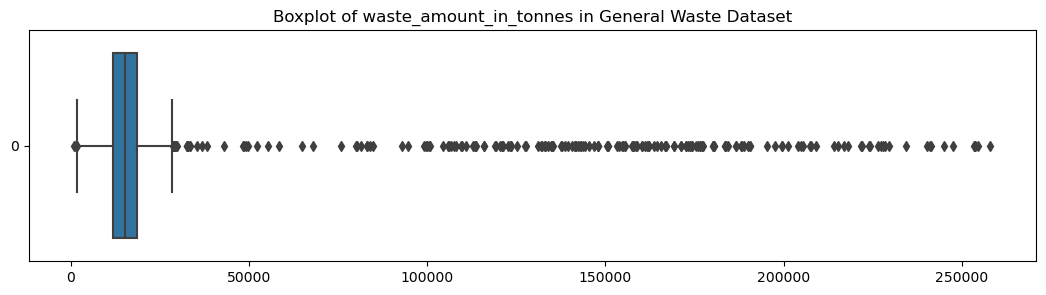

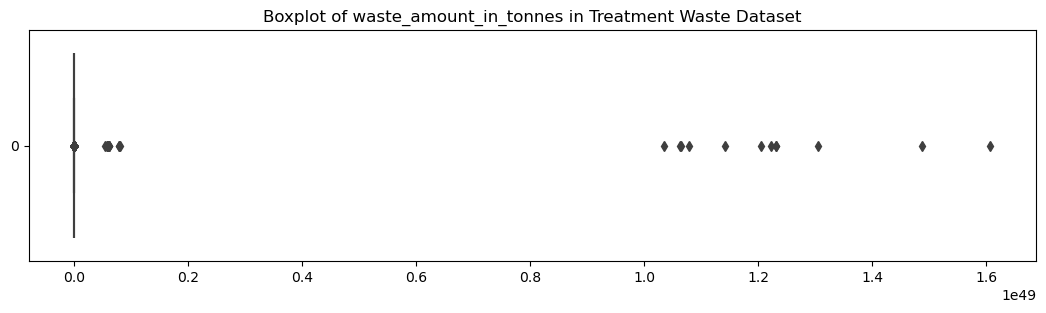

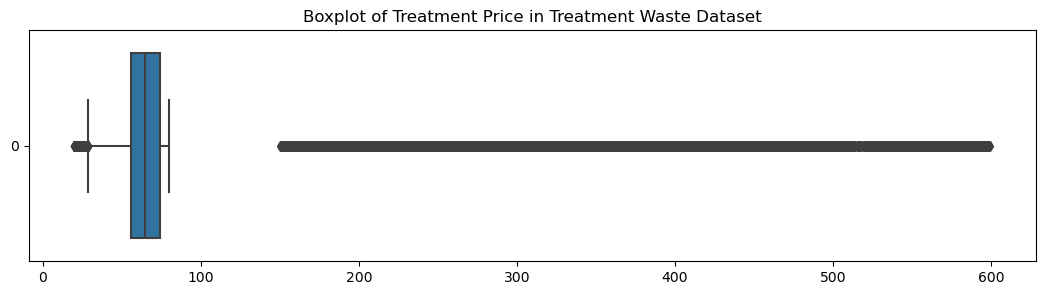

In [ ]:
# Boxplot for waste_amount_in_tonnes in generation data
plt.figure(figsize=(13, 3))
sns.boxplot(generation_data['waste_amount_in_tonnes'], orient='h')
plt.title('Boxplot of waste_amount_in_tonnes in General Waste Dataset')
plt.show()

# Boxplot for waste_amount_in_tonnes in treatment data
plt.figure(figsize=(13, 3))
sns.boxplot(treatment_data['waste_amount_in_tonnes'], orient='h')
plt.title('Boxplot of waste_amount_in_tonnes in Treatment Waste Dataset')
plt.show()

# Boxplot for treatment_price in treatment data
plt.figure(figsize=(13, 3))
sns.boxplot(treatment_data['treatment_price'], orient='h')
plt.title('Boxplot of Treatment Price in Treatment Waste Dataset')
plt.show()

Calculating the Outliers based on Inter-quartile method

In [ ]:
#Function to calculate outliers based on the IQR method
def calculate_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

# Calculate outliers for waste_amount_in_tonnes in both datasets
outliers_generation_waste = calculate_outliers(generation_data['waste_amount_in_tonnes'])
outliers_treatment_waste = calculate_outliers(treatment_data['waste_amount_in_tonnes'])

print(outliers_generation_waste)

# Calculate outliers for treatment_price in treatment dataset
outliers_tre_price = calculate_outliers(treatment_data['treatment_price'])


206      144382.8
253       94584.1
297      158021.2
357      122544.4
365      169266.0
           ...   
19284    166880.5
19389    125280.0
19568    158560.0
19614    253335.6
19623    218130.8
Name: waste_amount_in_tonnes, Length: 201, dtype: float64


Part 3: Exploratory Data Analysis

I performed Statistical Summary on the numerical columns to understand the distribution of the values in the dataset

In [ ]:
# Summary statistics for outliers in gen_df (waste_amount_in_tonnes)
summary_generation_waste_data = outliers_generation_waste.describe()

# Summary statistics for outliers in tre_df (waste_amount_in_tonnes)
summary_treatment_waste_data = outliers_treatment_waste.describe()

# Summary statistics for outliers in tre_df (treatment_price)
summary_tre_price = outliers_tre_price.describe()

summary_generation_waste_data, summary_treatment_waste_data, summary_tre_price

(count       201.000000
 mean     139125.499081
 std       61851.567357
 min         989.620000
 25%      106142.500000
 50%      144382.800000
 75%      180062.700000
 max      258000.000000
 Name: waste_amount_in_tonnes, dtype: float64,
 count    1.669000e+03
 mean     9.246604e+46
 std      1.043886e+48
 min      1.641655e+04
 25%      1.729645e+04
 50%      1.870248e+04
 75%      2.385900e+04
 max      1.606816e+49
 Name: waste_amount_in_tonnes, dtype: float64,
 count    5148.000000
 mean      319.449909
 std       129.201776
 min        20.000000
 25%       241.612500
 50%       314.000000
 75%       402.797500
 max       599.450000
 Name: treatment_price, dtype: float64)

looking at the summary of the statistics,we derived that the column waste_amount_in_tonnes for waste treatement dataset, and I replaced the outliers with the 95th percentile.

In [ ]:
# Number of outliers in each column
num_outliers_gen_waste = outliers_generation_waste.count()
num_outliers_tre_waste = outliers_treatment_waste.count()
num_outliers_tre_price = outliers_tre_price.count()

num_outliers_gen_waste, num_outliers_tre_waste, num_outliers_tre_price

(201, 1669, 5148)

In [ ]:
# Capping outliers in 'waste_amount_in_tonnes' for the Treatment Dataset using the 95th percentile
upper_bound = treatment_data['waste_amount_in_tonnes'].quantile(0.95)

# Applying the cap
treatment_data['waste_amount_in_tonnes'] = treatment_data['waste_amount_in_tonnes'].apply(lambda x: min(x, upper_bound))

# Verify changes by examining the new maximum value
new_max_waste_amount = treatment_data['waste_amount_in_tonnes'].max()
new_max_waste_amount

15222.753999999995

Creating a computed column to calculate the total price

In [ ]:
# Create a new calculated column 'total_treatment_price'
treatment_data['total_treatment_price'] = treatment_data['waste_amount_in_tonnes'] * treatment_data['treatment_price']

In [ ]:
# verifying results
treatment_data.head()

year quarter_number  county waste_type              waste_category  \
0  2004             Q1  Antrim  Hazardous              Chemical Waste   
1  2004             Q1  Antrim  Hazardous              Chemical Waste   
2  2004             Q1  Antrim  Hazardous            Electronic Waste   
3  2004             Q1  Antrim  Hazardous            Electronic Waste   
4  2004             Q1  Antrim  Hazardous  Hazardous Industrial Waste   

          treatment_method  waste_amount_in_tonnes  treatment_price  \
0  Disposal - Incineration                 9813.86           348.26   
1         Disposal - Other                 4205.94           255.40   
2     Recovery - Recycling                14926.92            69.00   
3         Disposal - Other                 1658.55           152.09   
4  Disposal - Incineration                12078.00            59.21   

   total_treatment_price  
0           3.417775e+06  
1           1.074197e+06  
2           1.029957e+06  
3           2.522489e+05  
4           7.151384e+05

In [ ]:
# Grouping data by 'year', 'quarter_number', 'county', 'waste_type', and 'waste_category'
# and calculating the sum of 'total_treatment_price' for each group
grouped_data = treatment_data.groupby(['year', 'quarter_number', 'county', 'waste_type', 'waste_category'])['total_treatment_price'].sum().reset_index()

In [ ]:
# Add computed column total_treatment_price in the generation dataset,

generation_data['total_treatment_price'] = grouped_data['total_treatment_price']

In [ ]:
generation_data.head()

year quarter_number  county     waste_type              waste_category  \
0  2004             Q1  Antrim      Hazardous              Chemical Waste   
1  2004             Q1  Antrim      Hazardous            Electronic Waste   
2  2004             Q1  Antrim      Hazardous  Hazardous Industrial Waste   
3  2004             Q1  Antrim      Hazardous               Medical Waste   
4  2004             Q1  Antrim  Non-Hazardous          Agricultural Waste   

   waste_amount_in_tonnes  total_treatment_price  
0            14019.800000           0.000000e+00  
1            16585.470000           4.491972e+06  
2            20131.460000           0.000000e+00  
3            16783.772632           1.282206e+06  
4            10779.940000           1.277128e+06

In [ ]:
generation_data.tail()

year quarter_number   county     waste_type  \
19651  2024             Q4  Wicklow  Non-Hazardous   
19652  2024             Q4  Wicklow  Non-Hazardous   
19653  2024             Q4  Wicklow  Non-Hazardous   
19654  2024             Q4  Wicklow  Non-Hazardous   
19655  2024             Q4  Wicklow  Non-Hazardous   

                        waste_category  waste_amount_in_tonnes  \
19651               Agricultural Waste                15959.17   
19652  Construction & Demolition Waste                 9311.68   
19653   Non-Hazardous Industrial Waste                14704.54   
19654            Municipal Solid Waste                19583.37   
19655                    Organic Waste                 8601.83   

       total_treatment_price  
19651           0.000000e+00  
19652           0.000000e+00  
19653           2.601947e+05  
19654           1.104553e+06  
19655           5.218323e+05

Understanding the statistical summary for the numerical columns in the waste generation dataset

In [ ]:
# Statistical summary for numerical columns in generation dataset
generation_data.describe()


waste_amount_in_tonnes  total_treatment_price
count            19656.000000           1.965600e+04
mean             16349.298064           7.241770e+05
std              14772.694058           1.190646e+06
min                989.620000           0.000000e+00
25%              11791.432500           0.000000e+00
50%              15156.480000           4.006747e+04
75%              18547.767500           1.038566e+06
max             258000.000000           1.093423e+07

Understanding the statistical summary for the numerical columns in the waste treatment dataset

In [ ]:
# Statistical summary for numerical columns in Treatment dataset
treatment_data.describe()

waste_amount_in_tonnes  treatment_price  total_treatment_price
count            45864.000000     45864.000000           4.586400e+04
mean              6453.763648        91.552907           6.190955e+05
std               3858.157018        92.398824           9.028605e+05
min                198.000000        20.000000           1.502494e+04
25%               3476.030000        56.000000           2.209478e+05
50%               5526.530000        64.910000           3.616103e+05
75%               8652.110000        74.200000           6.236770e+05
max              15222.754000       599.450000           9.103207e+06

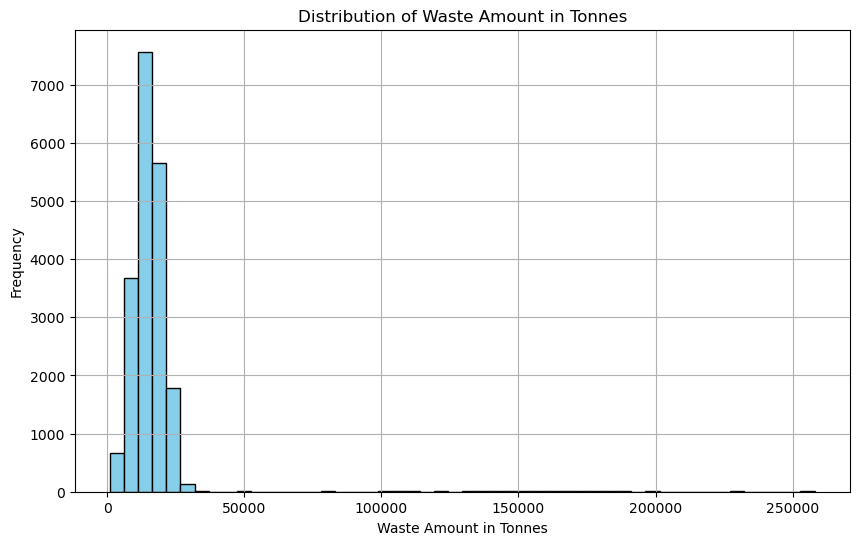

In [ ]:
# Plotting the distribution of waste amount in tonnes
plt.figure(figsize=(10,6))
plt.hist(generation_data['waste_amount_in_tonnes'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Waste Amount in Tonnes')
plt.xlabel('Waste Amount in Tonnes')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

from the histogram, we can analyse that the dataset is right skewed with most of the data being concentrated on the lower range.

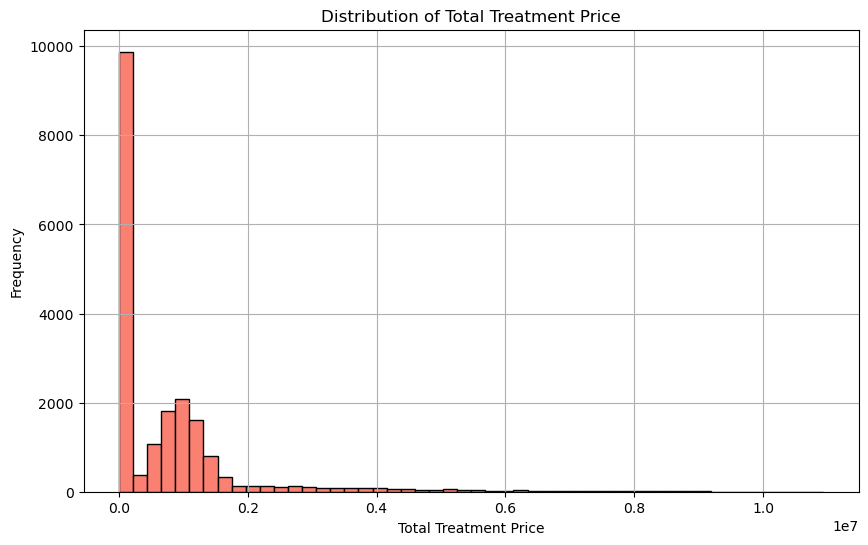

In [ ]:
# Plotting the distribution of treatment prices
plt.figure(figsize=(10,6))
plt.hist(generation_data['total_treatment_price'], bins=50, color='salmon', edgecolor='black')
plt.title('Distribution of Total Treatment Price')
plt.xlabel('Total Treatment Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

from the histogram of total treatment price, we observed that the dataset is highly right skewed with most values concentrated near the lower end of the price range

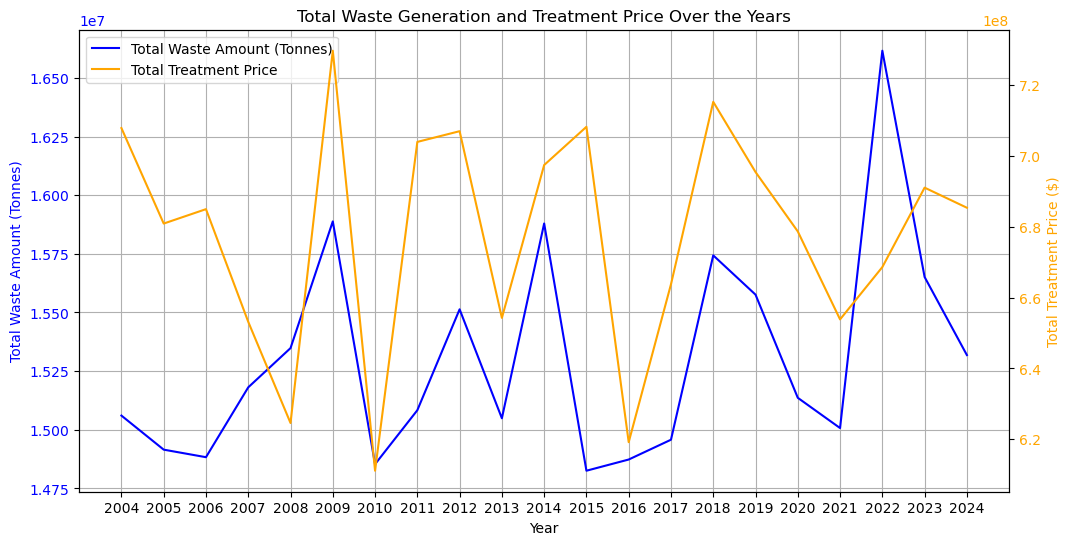

In [ ]:
# Plotting the trend of waste generation and treatment price over the years

plt.figure(figsize=(12, 6))

# Create the first axis
ax1 = plt.gca()  # Get the current Axes instance on the current figure
ax2 = ax1.twinx()  # Create a second y-axis that shares the same x-axis

# Plot the total waste amount on the first y-axis
ax1.plot(generation_data.groupby('year')['waste_amount_in_tonnes'].sum(), label='Total Waste Amount (Tonnes)', color='blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Waste Amount (Tonnes)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Plot the total treatment price on the second y-axis
ax2.plot(generation_data.groupby('year')['total_treatment_price'].sum(), label='Total Treatment Price', color='orange')
ax2.set_ylabel('Total Treatment Price (Euros)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Set the plot title and grid
plt.title('Total Waste Generation and Treatment Price Over the Years')
ax1.grid(True)

# Add a legend for both lines
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

# Show the plot
plt.show()


The graph shows the total waste amounts in tonnes and the total treatment price during the years 2004-2024. The blue line shows the total waste amount and asserts that the waste may be fluctuating but is generally limited within a very narrow range of 1.475e7 to 1.65e7 tonnes. The orange line indicates the total treatment price, which shows a much higher volatility with peaks occurring in 2009, 2013, and 2021. Strangely, the price of treatment spikes up on certain years, for instance, 2009 and 2021, without a corresponding rise in waste. This indicates that there are other cost-increasing factors, like inflation, change in policy, or composition variations. The former indicates that waste amounts kept being relatively more stabilized, unlike costs that became more variable depending on external or operational conditions.(Healy, 2018)

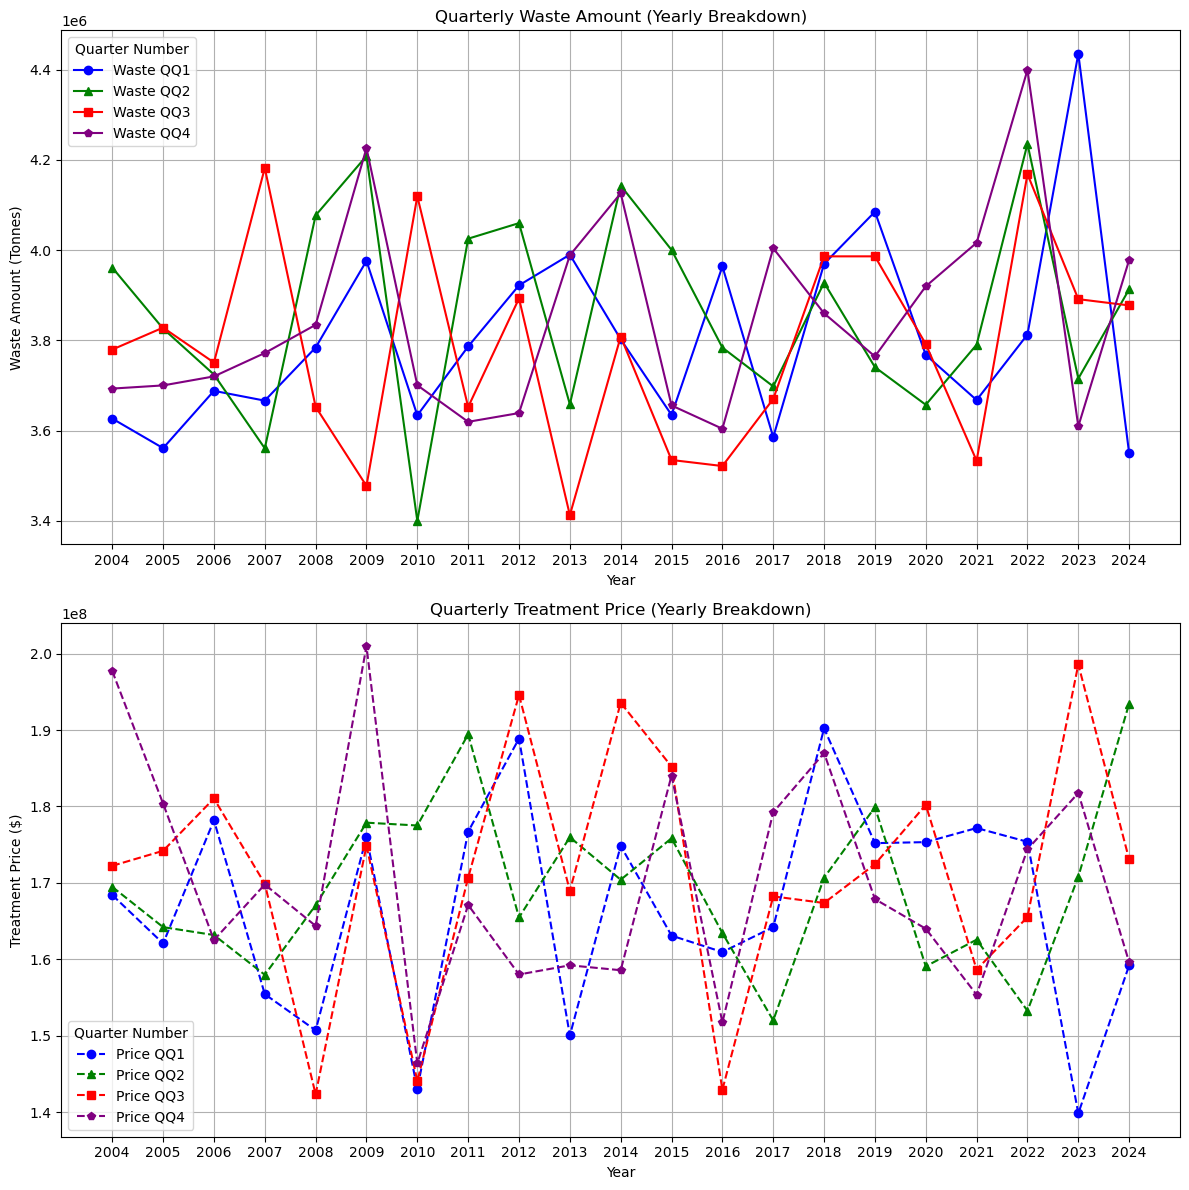

In [ ]:
# Grouping by year and quarter for time-series analysis
quarterly_waste = generation_data.groupby(['year', 'quarter_number'])['waste_amount_in_tonnes'].sum().unstack()
quarterly_price = generation_data.groupby(['year', 'quarter_number'])['total_treatment_price'].sum().unstack()

# Define a color map and markers for each quarter
colors = ['blue', 'green', 'red', 'purple']  # Different color for each quarter
markers = ['o', '^', 's', 'p']  # Different markers for each quarter

# Set up the subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))  # 2 Rows, 1 Column

# Plot each quarter's waste data with distinct colors on the first subplot
for i, quarter in enumerate(quarterly_waste.columns):
    ax1.plot(quarterly_waste.index, quarterly_waste[quarter], label=f'Waste Q{quarter}',
             color=colors[i], marker=markers[i])

# Plot each quarter's price data with distinct colors on the second subplot
for i, quarter in enumerate(quarterly_price.columns):
    ax2.plot(quarterly_price.index, quarterly_price[quarter], label=f'Price Q{quarter}',
             color=colors[i], marker=markers[i], linestyle='--')

# Adding titles, labels, and settings for the first subplot (Waste Amount)
ax1.set_title('Quarterly Waste Amount (Yearly Breakdown)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Waste Amount (Tonnes)')
ax1.legend(title='Quarter Number')
ax1.grid(True)

# Adding titles, labels, and settings for the second subplot (Treatment Price)
ax2.set_title('Quarterly Treatment Price (Yearly Breakdown)')
ax2.set_xlabel('Year')
ax2.set_ylabel('Treatment Price ($)')
ax2.legend(title='Quarter Number')
ax2.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

These graphs tell the quarterly trends in the amount of waste and treatment prices between 2004 and 2024, with the first graph tracking the quarterly wastes from all the quarters-Q1 to Q4. Each of the quarters has peaks and troughs, with some years, for instance, 2008, 2018, and 2022, being more prominent in waste amounts-perhaps in the Q3 and Q4. The second graph shows quarterly treatment prices which also tend to have some significant variations. The treatment prices follow similar trends over the year, with well-known peaks in certain years, for instance, 2008, 2011, and 2021, in which Q2 and Q4 have higher costs generally. Thus, the graphs point out clearly the season-and year-wise variations in waste treatment dynamics but not in a well-defined manner with respect to generation and costs associated with waste into quarters in contrast to situations.(Healy, 2018)

<Figure size 1200x600 with 0 Axes>

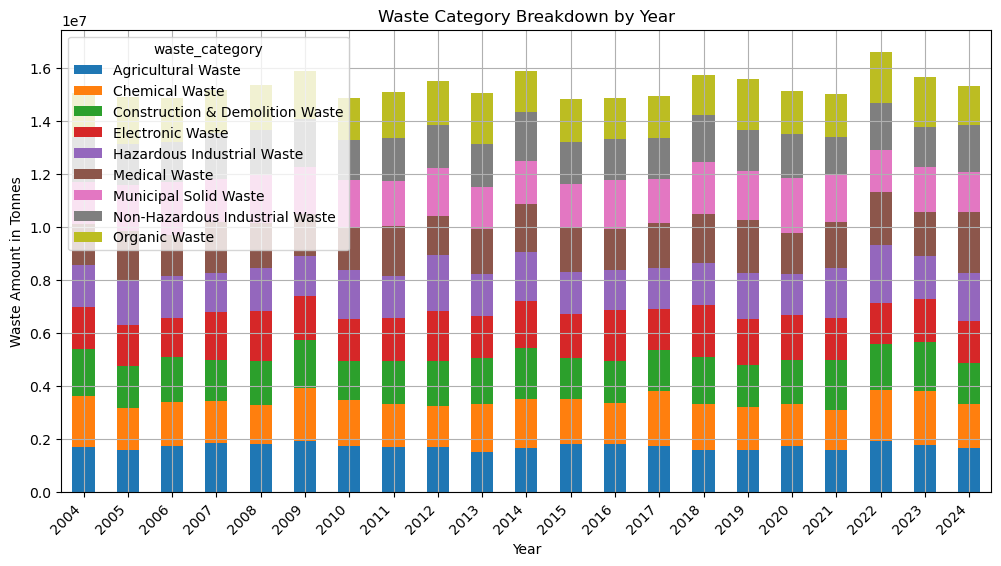

In [ ]:
#Waste Category Breakdown
# Breakdown of waste amount by type and county for the top counties
top_counties = generation_data.groupby('county')['waste_amount_in_tonnes'].sum().nlargest(10).index
county_waste_type = generation_data[generation_data['county'].isin(top_counties)].groupby(['county', 'waste_type'])['waste_amount_in_tonnes'].sum().unstack()

# Stacked bar chart for waste category by year
plt.figure(figsize=(12,6))
generation_data.groupby(['year', 'waste_category'])['waste_amount_in_tonnes'].sum().unstack().plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Waste Category Breakdown by Year')
plt.xlabel('Year')
plt.ylabel('Waste Amount in Tonnes')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

This stacked bar chart shows the categorization of the yearly quantity by waste types in tons for the years from 2004 to 2024. The major proportions belong to Agricultural Waste, Municipal Solid Waste, and Construction and Demolition Waste, while Electronic Waste and Hazardous Industrial Waste have small shares. Due to gradual increases over the years, there has been a notable increment in both Organic Waste and Municipal Solid Waste in total waste. The pattern of balanced categories indicates consistent generation patterns across sectors with minimum variations. This chart thus helps to manage effective waste control measures for the high contributors so that rising levels of total waste can be managed.

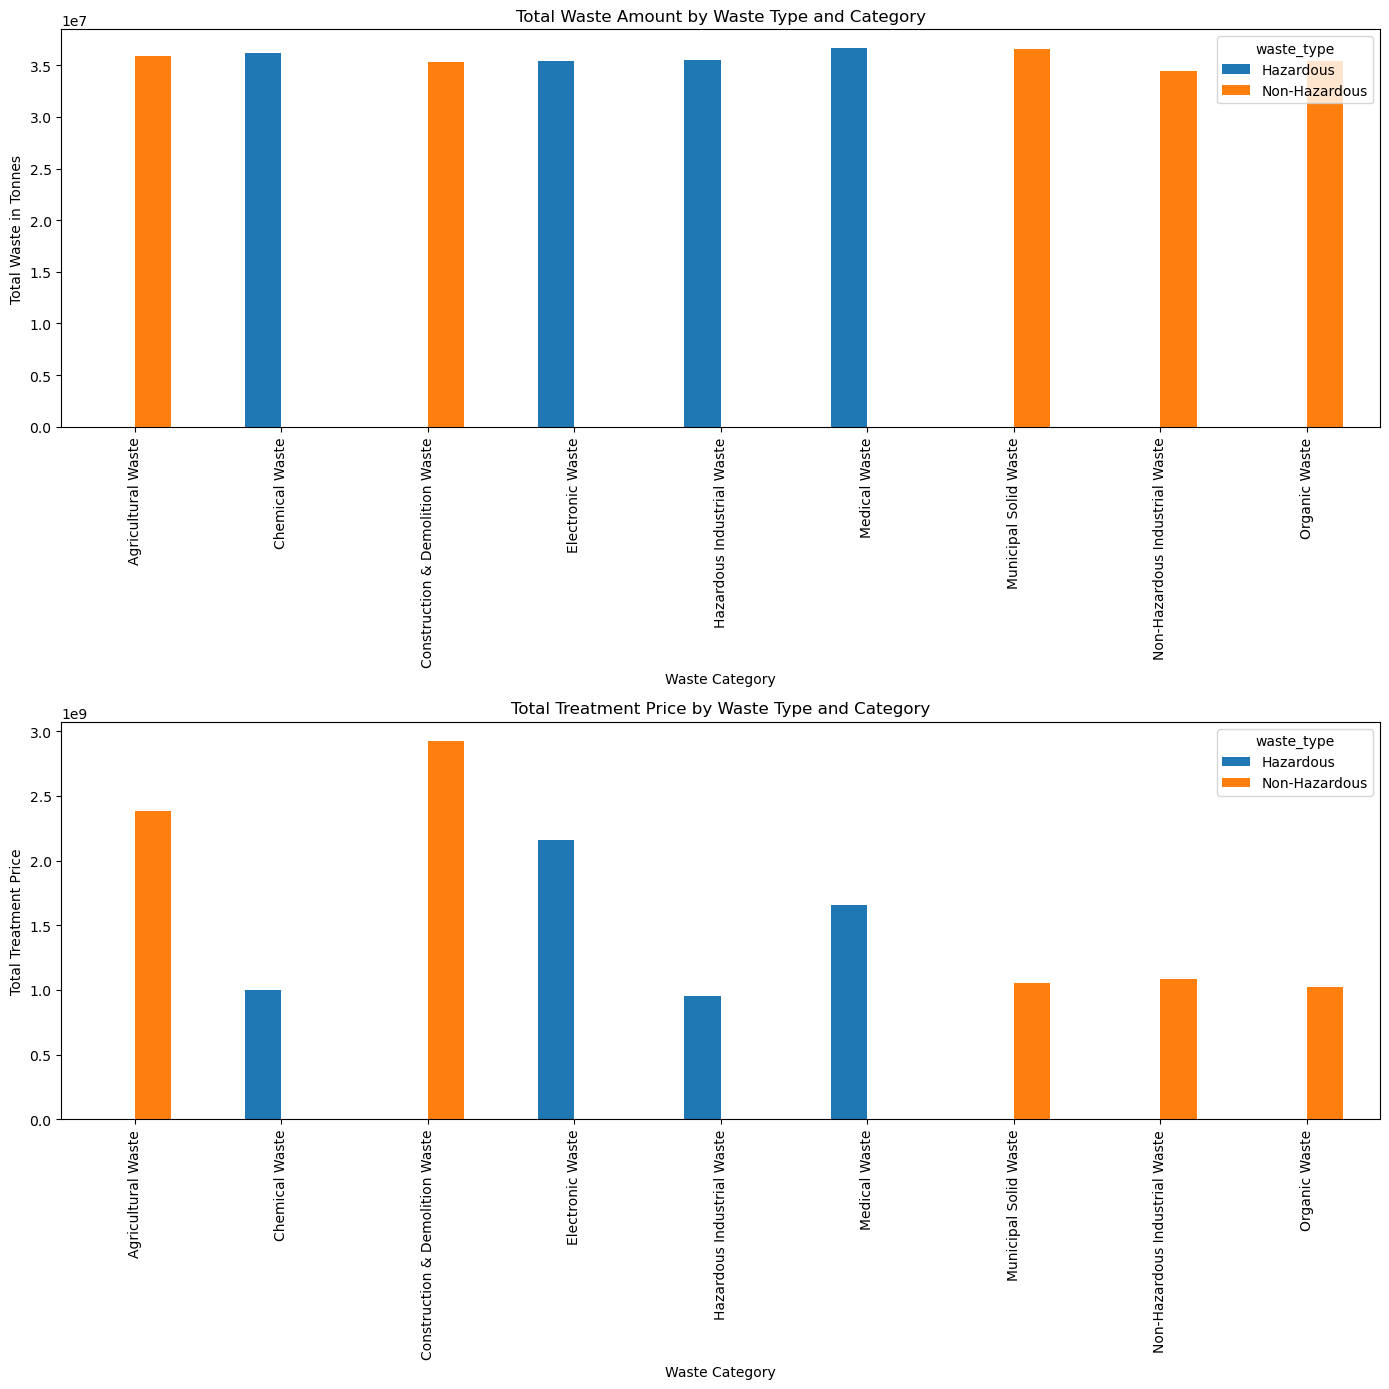

In [ ]:
# Aggregate waste amount and treatment price by waste type and category
waste_type_category_data = generation_data.groupby(['waste_type', 'waste_category']).agg({
    'waste_amount_in_tonnes': 'sum',
    'total_treatment_price': 'sum'
}).sort_values(by='waste_amount_in_tonnes', ascending=False).reset_index()

# Set up the subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 14))

# Pivot data for waste amount
pivot_waste = waste_type_category_data.pivot(index="waste_category", columns="waste_type", values="waste_amount_in_tonnes")
# Plot for waste amount
pivot_waste.plot(kind='bar', ax=ax1)
ax1.set_title('Total Waste Amount by Waste Type and Category')
ax1.set_ylabel('Total Waste in Tonnes')
ax1.set_xlabel('Waste Category')

# Pivot data for treatment price
pivot_price = waste_type_category_data.pivot(index="waste_category", columns="waste_type", values="total_treatment_price")
# Plot for treatment price
pivot_price.plot(kind='bar', ax=ax2)
ax2.set_title('Total Treatment Price by Waste Type and Category')
ax2.set_ylabel('Total Treatment Price')
ax2.set_xlabel('Waste Category')

# Adjust layout and show plot
plt.tight_layout()
plt.show()


The graphs indeed compare the amount of total waste and the treatment costs pertaining to various waste types in different waste categories. In the first graph, it can be observed that hazardous waste makes up most of the categories like chemical, medical, and hazardous industrial waste, while non-hazardous waste has the greatest accumulated amount in agricultural, municipal solid, and construction & demolition waste categories. There is also a significant difference in costs incurred for treating hazardous waste, with several times higher treatment costs incurred on the average for medical and hazardous industrial waste treatment relative to other non-hazardous waste categories, like agricultural and construction & demolition waste. Patterns show the average treatment costs per category and the volume differences brought forth due to the waste type and category.

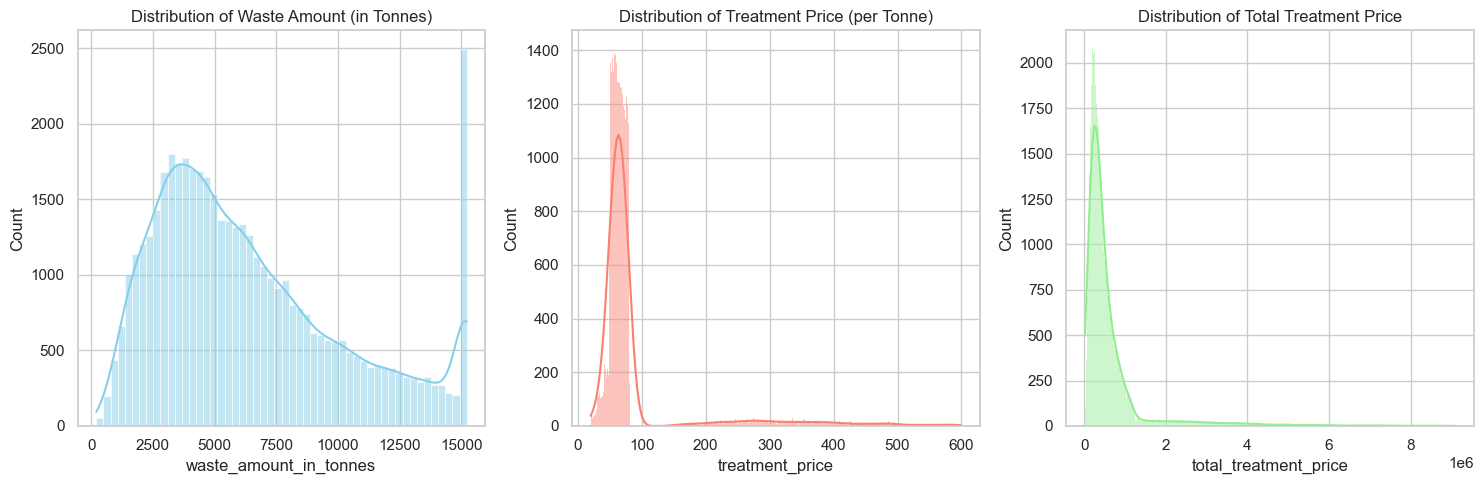

In [ ]:
# Set the style for the plots
sns.set(style="whitegrid")

# Plot histograms for numerical columns
numerical_columns = ['waste_amount_in_tonnes', 'treatment_price', 'total_treatment_price']

plt.figure(figsize=(15, 5))

# Plot for waste_amount_in_tonnes
plt.subplot(1, 3, 1)
sns.histplot(treatment_data['waste_amount_in_tonnes'], kde=True, color="skyblue")
plt.title("Distribution of Waste Amount (in Tonnes)")

# Plot for treatment_price
plt.subplot(1, 3, 2)
sns.histplot(treatment_data['treatment_price'], kde=True, color="salmon")
plt.title("Distribution of Treatment Price (per Tonne)")

# Plot for total_treatment_price
plt.subplot(1, 3, 3)
sns.histplot(treatment_data['total_treatment_price'], kde=True, color="lightgreen")
plt.title("Distribution of Total Treatment Price")

plt.tight_layout()
plt.show()

The three charts show the breakdown of quantity of waste, cost of treatment per ton, and entire cost of treatment. The first chart shows that most quantities of waste range between 2,000 and 7,500 tons and the value falls sharply after 10,000 tons. The second chart states that treatment prices are clustered around the majority of treatments at a price per ton of less than 100, while only a few of them were beyond 200. The third chart indicates that total treatment figures were highly skewed to lower levels, with most below 1 million units. Overall, the distribution does indicate the fact that waste treatment happened to be more likely in smaller amounts of waste, cheaper per-ton prices, and lower total costs.

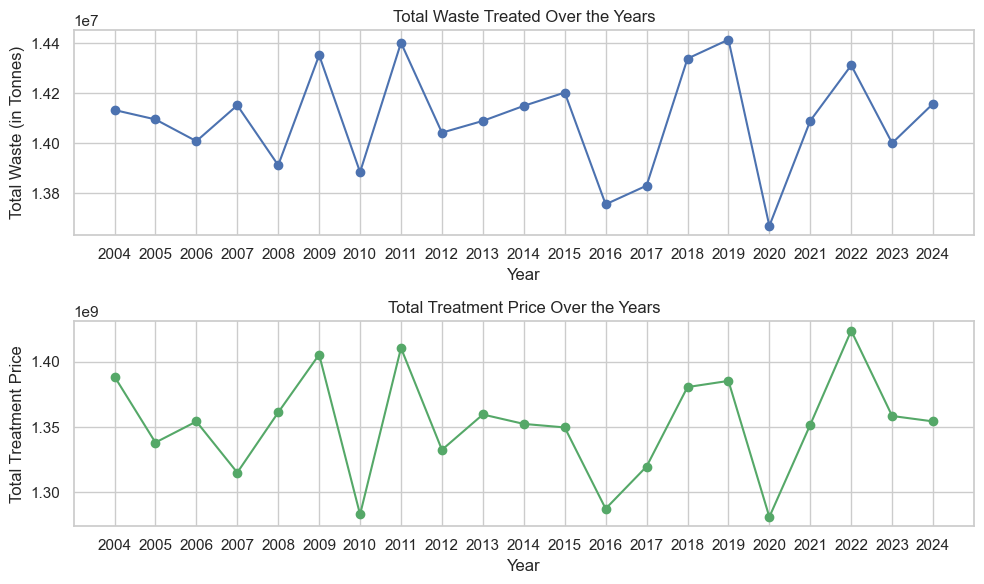

In [ ]:
# Group by year to calculate total waste treated and total treatment price each year
yearly_trends = treatment_data.groupby('year')[['waste_amount_in_tonnes', 'total_treatment_price']].sum()

# Plotting the trend analysis over the years
plt.figure(figsize=(10, 6))

# Plot total waste treated
plt.subplot(2, 1, 1)
plt.plot(yearly_trends.index, yearly_trends['waste_amount_in_tonnes'], marker='o', color='b')
plt.title('Total Waste Treated Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Waste (in Tonnes)')

# Plot total treatment price
plt.subplot(2, 1, 2)
plt.plot(yearly_trends.index, yearly_trends['total_treatment_price'], marker='o', color='g')
plt.title('Total Treatment Price Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Treatment Price')

plt.tight_layout()
plt.show()

Between 1.38e7 and 1.44e7, total waste treatment in 2004 and 2024 seems to be varying yearly. T. The highest peaks got in the years 2011, 2018, and 2022, and the less marked falls are phenomenal in the years 2013 and 2020. Figures from the second chart represent the total treatment price for the same well-defined stage, which makes it go with a general similar fluctuating trend. Thus, the trends above in their conclusion denote waste treatment volumes and costs that are not constant at all but swing pretty wildly within some years, allegedly by causes beyond one's control, like policy changes and the economy itself.

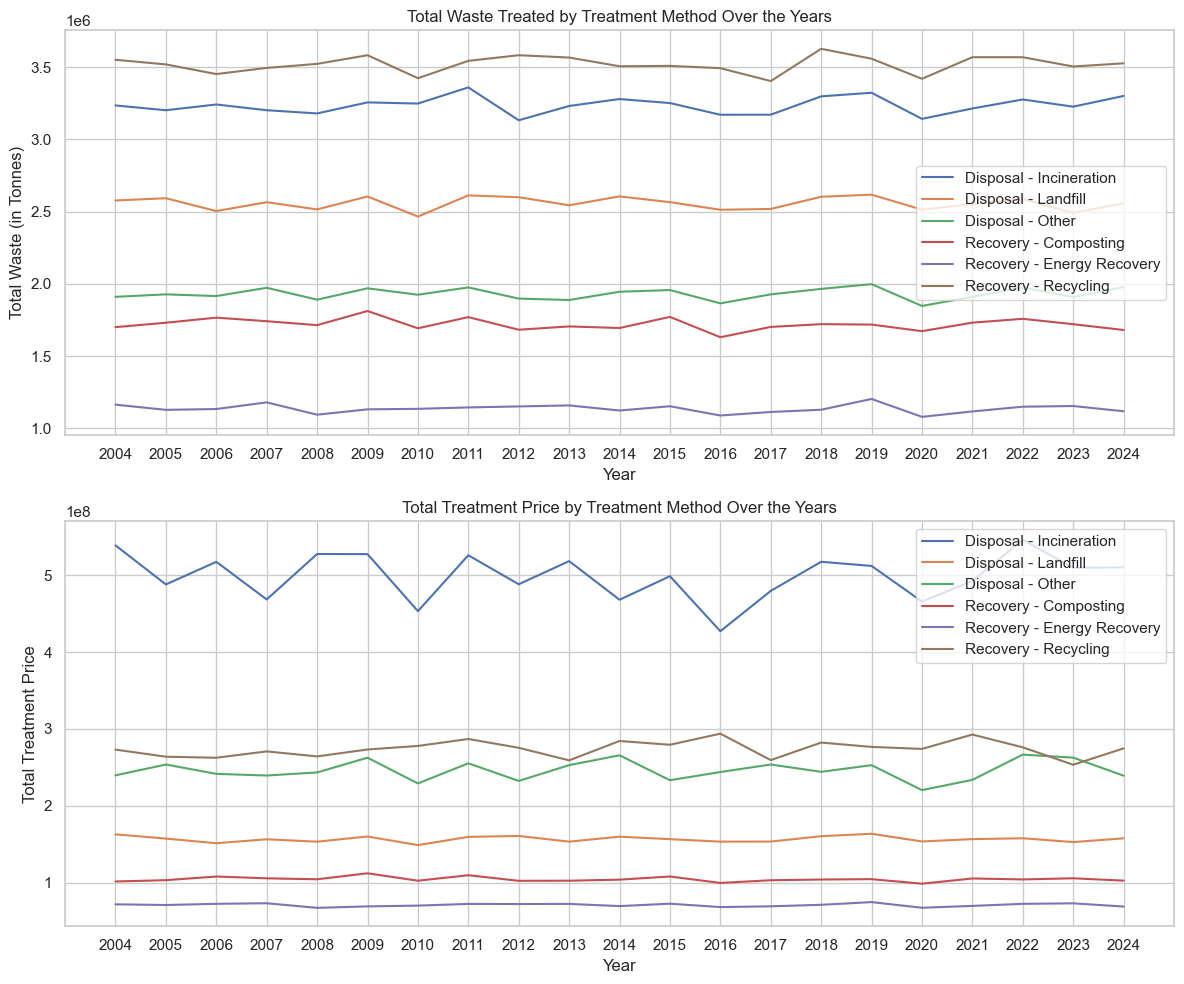

In [ ]:
# Group by year and treatment method to calculate total waste and total treatment price per method
time_series_method = treatment_data.groupby(['year', 'treatment_method'])[['waste_amount_in_tonnes', 'total_treatment_price']].sum().reset_index()

# Plot the trend analysis for each treatment method
plt.figure(figsize=(12, 10))

# Plot total waste treated by treatment method
plt.subplot(2, 1, 1)
for method in time_series_method['treatment_method'].unique():
    method_data = time_series_method[time_series_method['treatment_method'] == method]
    plt.plot(method_data['year'], method_data['waste_amount_in_tonnes'], label=method)

plt.title('Total Waste Treated by Treatment Method Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Waste (in Tonnes)')
plt.legend()

# Plot total treatment price by treatment method
plt.subplot(2, 1, 2)
for method in time_series_method['treatment_method'].unique():
    method_data = time_series_method[time_series_method['treatment_method'] == method]
    plt.plot(method_data['year'], method_data['total_treatment_price'], label=method)

plt.title('Total Treatment Price by Treatment Method Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Treatment Price')
plt.legend()

plt.tight_layout()
plt.show()


The two charts shows trends in the total amount of waste treated, along with total treatment cost by different methods during those years, from 2004 to 2024. In the first chart, landfill has the highest total waste, followed by incineration while recycling and composting comprised a minor portion. Over the years, the amount of waste treatment remains constant, slightly fluctuating above or below the normal capacity for all methods. The second chart shows that incineration costs the highest in treatment and this clearly shows its complex nature, followed by landfill, while other disposal methods are cheaper. Even though they differ a lot in their price trend, overall cost rankings remain unchanged over the years. These trends show that although landfill may be high volume, incineration becomes the costliest method and recovery methods thus remain low-cost and less utilized.

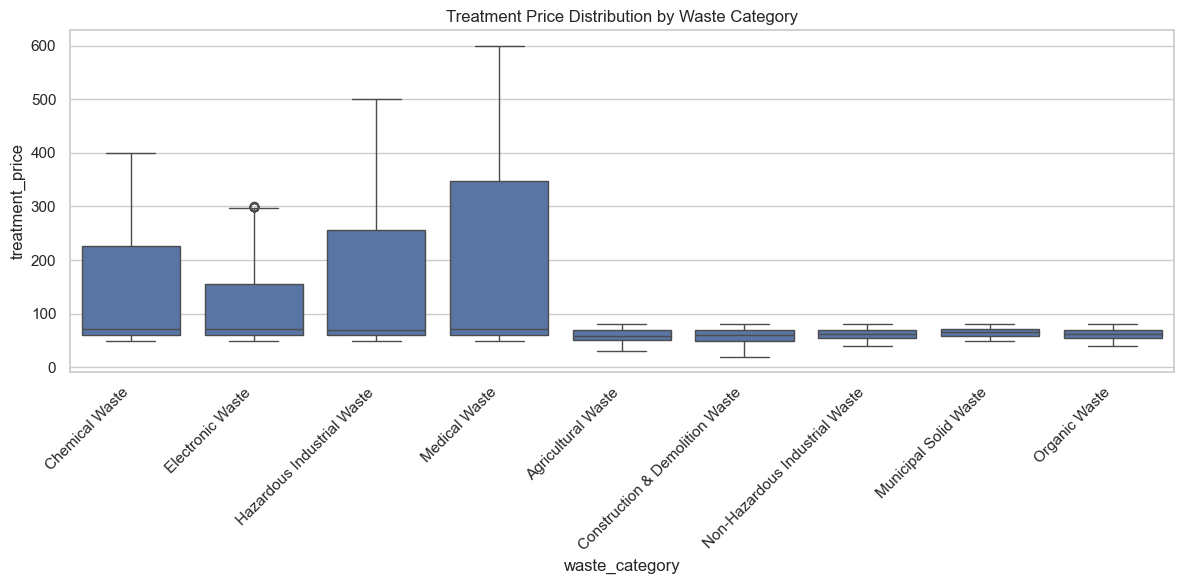

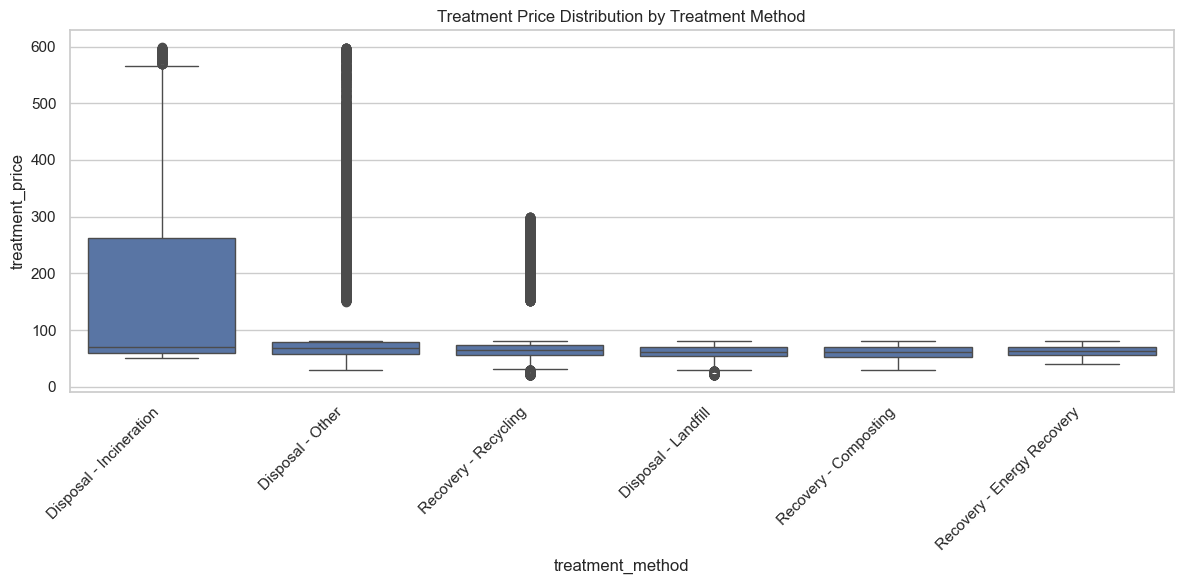

In [ ]:
# Boxplot for treatment price by waste category
plt.figure(figsize=(12, 6))
sns.boxplot(x='waste_category', y='treatment_price', data=treatment_data)
plt.title('Treatment Price Distribution by Waste Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Boxplot for treatment price by treatment method
plt.figure(figsize=(12, 6))
sns.boxplot(x='treatment_method', y='treatment_price', data=treatment_data)
plt.title('Treatment Price Distribution by Treatment Method')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The first boxplot shows how treatment prices differ across different waste categories. Medical waste has the highest treatment costs and the most variability, because of its complexity of handling. Chemical waste and hazardous industrial waste also have high costs, while electronic waste has lower costs but some variation. Categories like municipal solid waste, organic waste, and construction & demolition waste have the lowest treatment prices. The second boxplot compares treatment methods. Incineration has the highest cost, with several extreme outliers. Recovery methods like recycling, composting, and energy recovery are more affordable. These graphs show that treatment costs depend highly on the type of waste and method used, with medical waste and incineration being the most expensive ones.

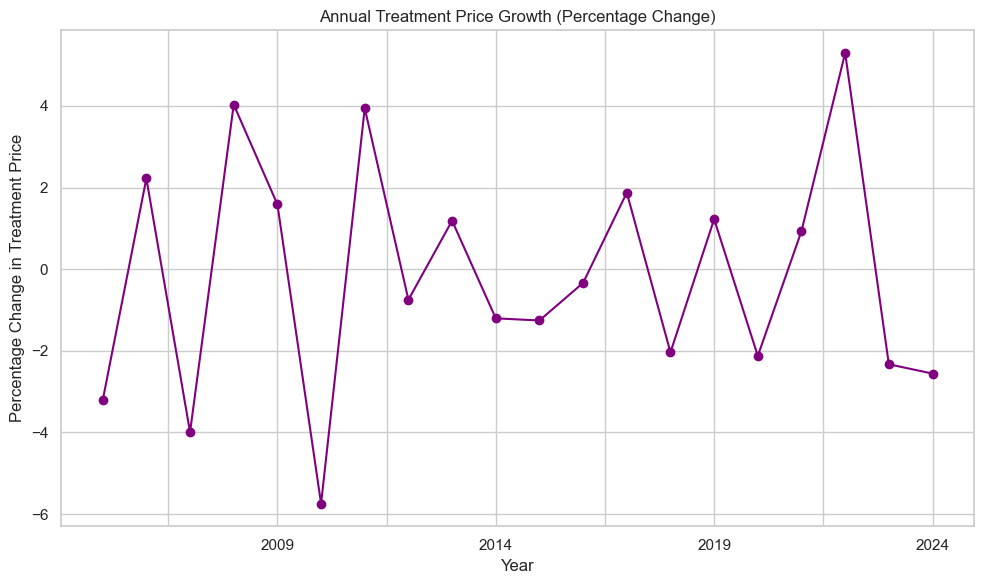

In [ ]:
# Calculate annual percentage change in treatment price
annual_price_growth = treatment_data.groupby('year')['treatment_price'].mean().pct_change() * 100

# Plot the annual growth in treatment price
plt.figure(figsize=(10, 6))
annual_price_growth.plot(kind='line', marker='o', color='purple')
plt.title('Annual Treatment Price Growth (Percentage Change)')
plt.xlabel('Year')
plt.ylabel('Percentage Change in Treatment Price')
plt.tight_layout()
plt.show()

According to the figure, the passing yearly change percentage in treatment prices is seen to reflect movements- increases and decreases in price-from the years 2008-2024. Its quite unpredictable trend does have sharp peaks and declines. Peak treatment price increases occur during 2009, 2014, and then again in 2021, with increases exceeding 4%. The sharpest decline, such as in 2013 and 2024, are seen in terms of declines in growth of nearly -6%. The trend is uneven and strong, which shows that treatment prices are affected by ever-changing variables like the economy, policy changes, or shifts in waste disposal practices. While punctuated by stabilization periods, the movement leads to modifications in annual price turn treatment.

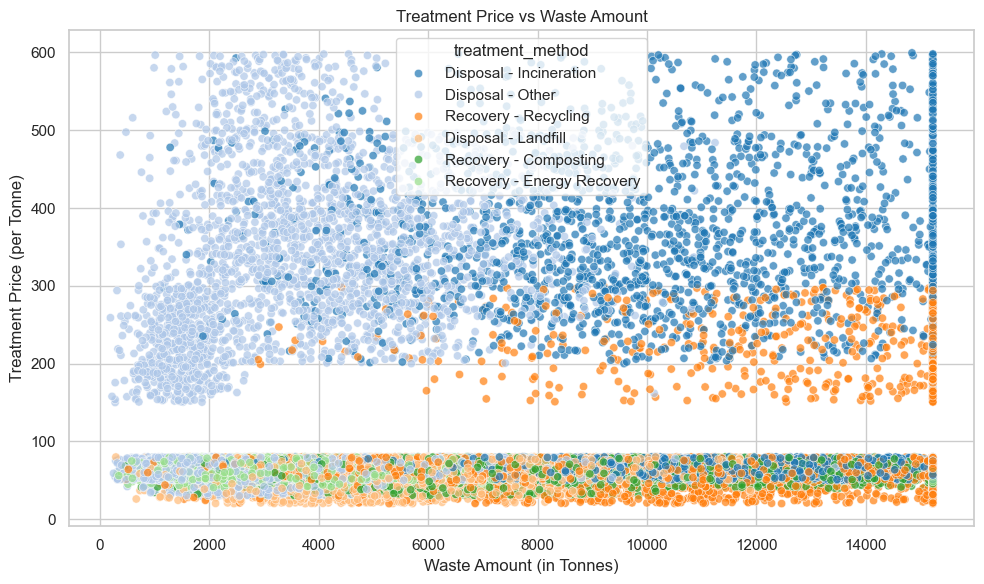

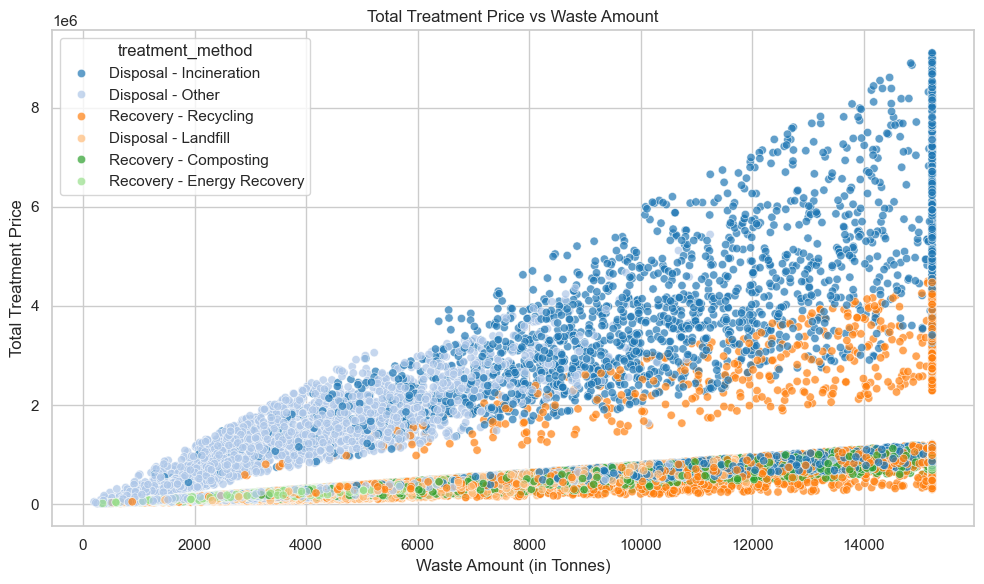

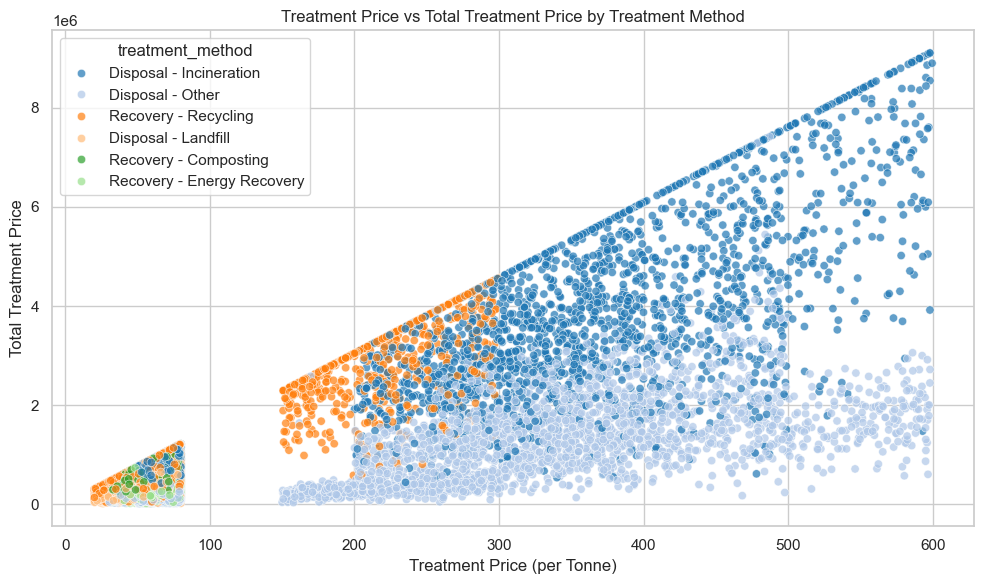

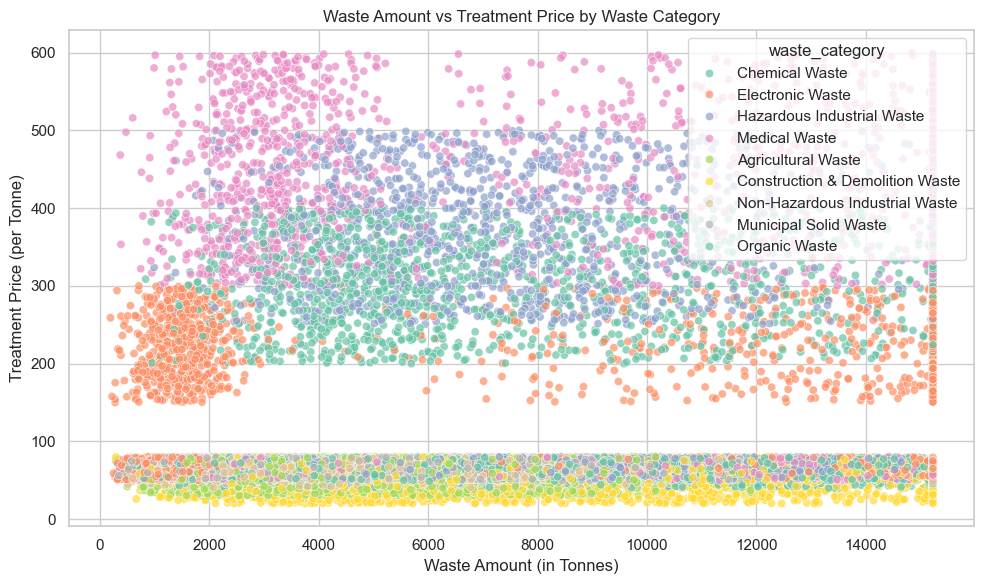

In [ ]:
# Scatter plot: Treatment Price vs Waste Amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='waste_amount_in_tonnes', y='treatment_price', data=treatment_data, hue='treatment_method', palette='tab20', alpha=0.7)
plt.title('Treatment Price vs Waste Amount')
plt.xlabel('Waste Amount (in Tonnes)')
plt.ylabel('Treatment Price (per Tonne)')
plt.tight_layout()
plt.show()

# Scatter plot: Total Treatment Price vs Waste Amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='waste_amount_in_tonnes', y='total_treatment_price', data=treatment_data, hue='treatment_method', palette='tab20', alpha=0.7)
plt.title('Total Treatment Price vs Waste Amount')
plt.xlabel('Waste Amount (in Tonnes)')
plt.ylabel('Total Treatment Price')
plt.tight_layout()
plt.show()

# Scatter plot: Treatment Price vs Total Treatment Price by Treatment Method
plt.figure(figsize=(10, 6))
sns.scatterplot(x='treatment_price', y='total_treatment_price', data=treatment_data, hue='treatment_method', palette='tab20', alpha=0.7)
plt.title('Treatment Price vs Total Treatment Price by Treatment Method')
plt.xlabel('Treatment Price (per Tonne)')
plt.ylabel('Total Treatment Price')
plt.tight_layout()
plt.show()

# Scatter plot: Waste Amount vs Treatment Price by Waste Category
plt.figure(figsize=(10, 6))
sns.scatterplot(x='waste_amount_in_tonnes', y='treatment_price', data=treatment_data, hue='waste_category', palette='Set2', alpha=0.7)
plt.title('Waste Amount vs Treatment Price by Waste Category')
plt.xlabel('Waste Amount (in Tonnes)')
plt.ylabel('Treatment Price (per Tonne)')
plt.tight_layout()
plt.show()

These graphs reveal how waste amounts, treatment prices, treatment technique, and waste categories are related. First, it shows the comparison of treatment price and waste amount between incineration, recycling, landfill, and composting as treatment techniques. It can be seen that incineration and landfill are quite expensive as treatment techniques, while costs for composting and energy recovery are much lower. The second graph shows different waste types such as chemical, medical, and municipal solid waste, with some of the types always retaining higher prices, even in treatment, alluding to the complexity of handling them. The third graph deals with the treatment price per ton with total treatment price across the different ways, with higher per ton costs mainly affecting total costs so much when treating large quantities. Finally, there is the last graph, which gives the treatment price in total and the waste quantities in tons, with both showing a positive correlation in terms of increasing waste volume, with the cost of waste treatment varying depending on the techniques used. The four graphs collectively illustrate the different treatment costs driven by waste type, treatment method, and waste quantity. These graphs call for waste management strategies.

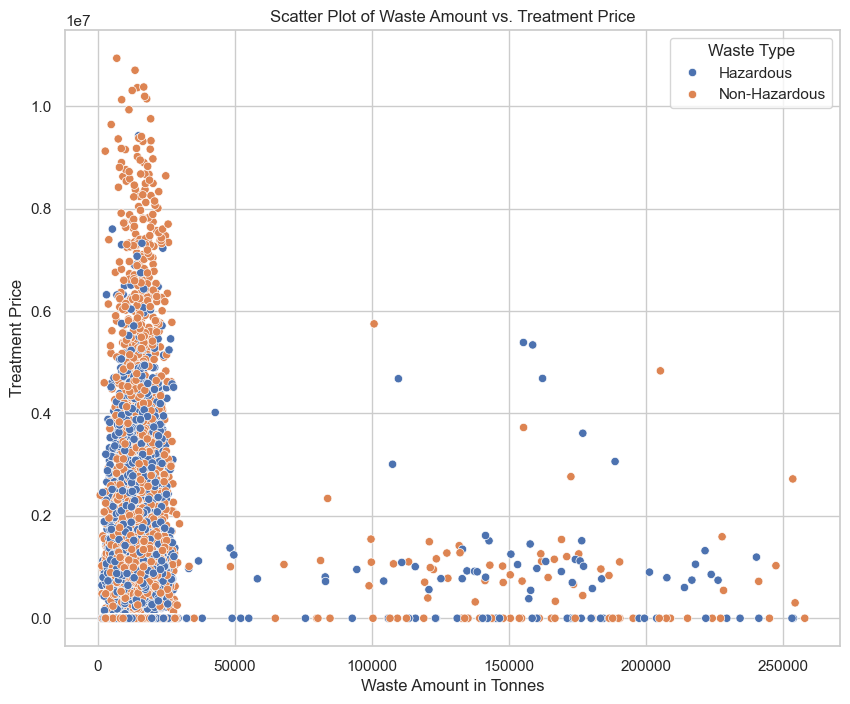

In [ ]:
# Scatter plot for Waste Amount vs. Treatment Price, color-coded by Waste Type
plt.figure(figsize=(10, 8))
sns.scatterplot(data=generation_data, x='waste_amount_in_tonnes', y='total_treatment_price', hue='waste_type')
plt.title('Scatter Plot of Waste Amount vs. Treatment Price')
plt.xlabel('Waste Amount in Tonnes')
plt.ylabel('Treatment Price')
plt.grid(True)
plt.legend(title='Waste Type')
plt.show()

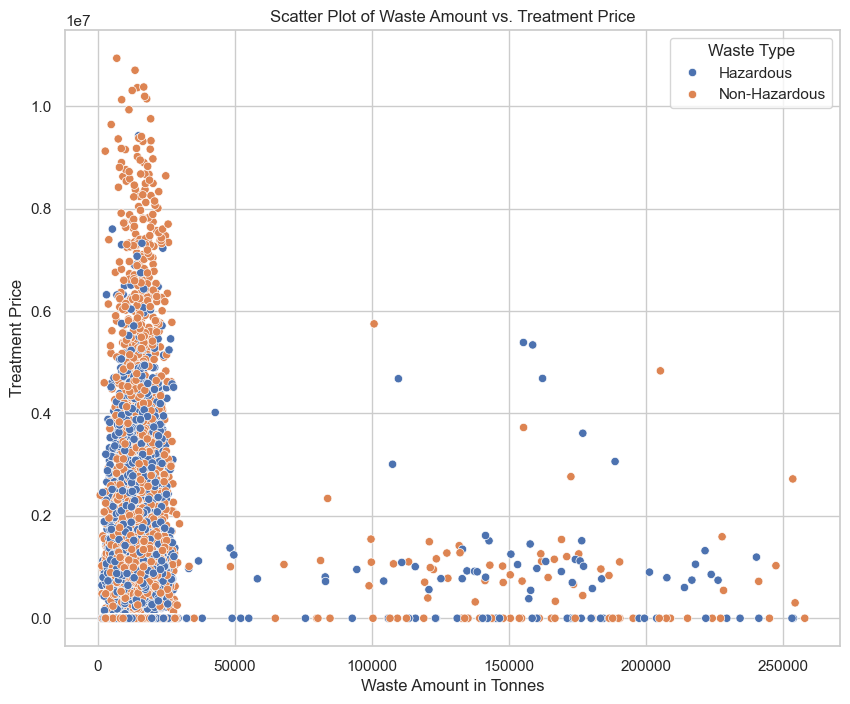

In [ ]:
# Scatter plot for Waste Amount vs. Treatment Price, color-coded by Waste Type
plt.figure(figsize=(10, 8))
sns.scatterplot(data=generation_data, x='waste_amount_in_tonnes', y='total_treatment_price', hue='waste_type')
plt.title('Scatter Plot of Waste Amount vs. Treatment Price')
plt.xlabel('Waste Amount in Tonnes')
plt.ylabel('Treatment Price')
plt.grid(True)
plt.legend(title='Waste Type')
plt.show()

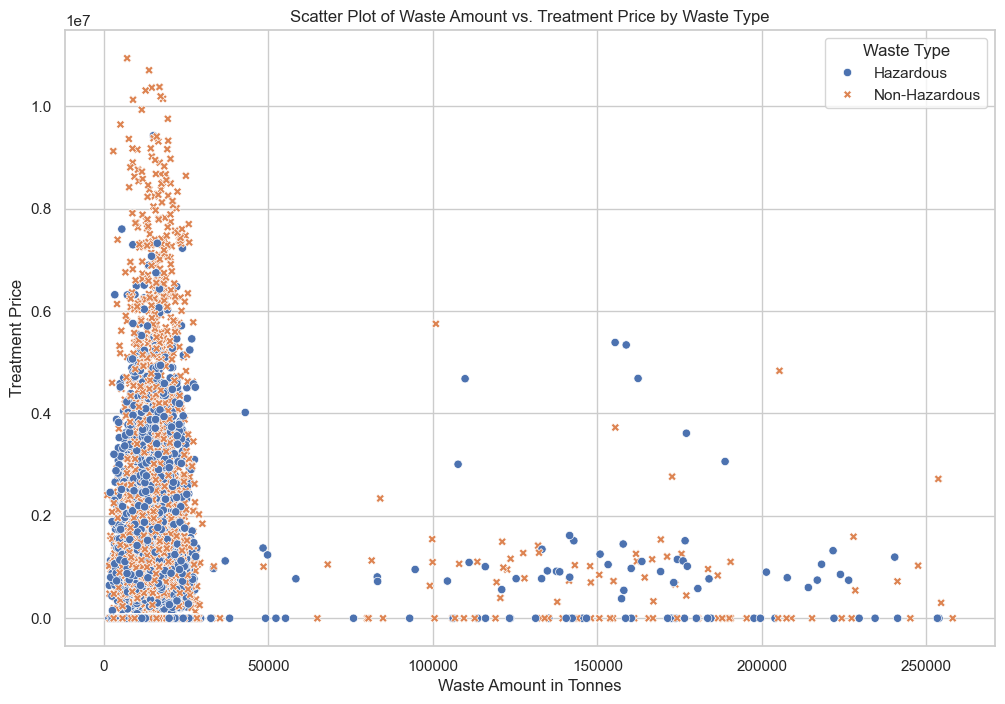

In [ ]:
# Creating the scatter plot again with a check for correct data handling
plt.figure(figsize=(12, 8))
scatter_plot = sns.scatterplot(data=generation_data, x='waste_amount_in_tonnes', y='total_treatment_price', hue='waste_type', style='waste_type')
plt.title('Scatter Plot of Waste Amount vs. Treatment Price by Waste Type')
plt.xlabel('Waste Amount in Tonnes')
plt.ylabel('Treatment Price')
plt.legend(title='Waste Type')
plt.grid(True)
plt.show()

Across the three scatter plots, the relationship between waste amount and treatment price reveals a negative correlation, where higher waste amounts are associated with lower treatment prices, reflecting economies of scale. All graphs show a strong sense of data points for smaller waste amounts, where treatment prices vary very much, reaching up to 10 million. Hazardous waste (blue dots) occasionally exhibits higher treatment prices, even at larger waste amounts, indicating the complexity and regulatory requirements for its treatment. Non-hazardous waste (orange dots), on the other hand, is more frequent and tends to have lower, more consistent treatment costs. Outliers are present in all graphs, with high treatment prices at low waste amounts and a few cases of high prices at larger waste quantities. Overall, the insights across the graphs shows the cost variability and operational activities of hazardous waste management compared to the patterns for non-hazardous waste, while defining the economic advantages of handling larger waste volumes